# Instal Library yang dibutuhkan

In [3]:

#instal matplotlib
%pip install matplotlib

# Instal seaborn
%pip install seaborn

# Instal missingno
%pip install missingno

# Instal pandas
%pip install pandas

# Instal numpy
%pip install numpy

# Install scipy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Import Library Yang Dibutuhkan

In [4]:
import matplotlib.pyplot as plt #Lebih basic untuk customisasi
import seaborn as sns #library baru yang dibuat oleh matplotlib --> Banyak yang sudah otomasi
import missingno #library untuk menampilkan matriks yang menunjukkan pola data yang hilang di dataset
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt #menyediakan serangkaian fungsi yang mirip dengan MATLAB untuk membuat berbagai jenis visualisasi data, seperti grafik, plot, histogram
import seaborn as sns #memudahkan pembuatan visualisasi statistik
from scipy.stats import kstest # Uji Statistika Kolmogorov Smirnov
from scipy.stats import shapiro # Uji Statistika Shapiro Wilk
from statsmodels.stats.diagnostic import lilliefors #Uji Statistika lilliefors
from scipy.stats import normaltest # Uji Statistika D'Agustino Pearson
from scipy import stats # Z-score

# Original File

In [5]:
#membaca file
sampledata = pd.read_csv('Airbnb Listings Bangkok.csv')

#Menampilkan data
sampledata

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


# Dictionary

| Coloum | Description |
|------|--------------|
| id | Identifikasi unik untuk setiap listing di Airbnb. |
| name | Nama dari listing tersebut. |
| host_id | Identifikasi unik untuk setiap host atau pengguna di Airbnb. |
| host_name | Nama dari host, biasanya hanya nama depan. |
| neighborhood | Nama lingkungan berdasarkan geocode dari latitude dan longitude yang sesuai dengan bentuk digital publik. |
| latitude & longitude | Koordinat geografis menggunakan sistem World Geodetic System (WGS84). |
| room_type | Tipe ruangan, seperti Entire home/apt, Private room, Shared room, atau Hotel. |
| | **Entire home/apt** : pilihan terbaik jika mencari suasana seperti di rumah sendiri. Akan mendapatkan seluruh ruang untuk diri sendiri, termasuk kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah. Host harus mencantumkan di deskripsi apakah mereka tinggal di properti atau tidak, dan memberikan detail lebih lanjut dalam listing. |
| | **Private rooms** : Private rooms cocok jika menginginkan privasi namun tetap ingin terhubung dengan penduduk lokal. Dengan memesan Private rooms, akan mendapatkan kamar tidur pribadi dan mungkin harus berbagi beberapa ruang dengan orang lain. Anda mungkin perlu melewati ruang bersama yang bisa ditempati oleh host atau tamu lain untuk mencapai kamar. |
| | **Shared rooms** : Kamar ini dibuat dengan konsep berbagi ruang dengan orang lain. Dengan memesan Shared rooms, kita akan tidur di ruang yang dibagi dengan orang lain dan berbagi seluruh ruang dengan orang lain. Shared rooms populer di kalangan pelancong yang fleksibel, mencari teman baru, dan penginapan yang ramah anggaran |
| | **Hotel rooms** kamar hotel memberikan level layanan dan keramahtamahan layaknya hotel konvensional. Kamar ini tersedia di hotel butik atau hotel gaya hidup, hostel, bed and breakfast, atau properti serupa. Tipe kamar ini biasanya menyertakan area bersama yang semarak dan ruangan dengan sentuhan unik. (source: [Airbnb](https://www.airbnb.co.id/help/article/5))|
| price | Harga harian dalam mata uang lokal. |
| minimum_nights | Jumlah minimal malam yang harus diambil untuk listing tersebut. |
| number_of_reviews | Jumlah total ulasan yang telah diterima oleh listing tersebut. |
| last_review | Tanggal ulasan terakhir yang diterima oleh listing tersebut. |
| reviews_per_month | review yang diberikan setiap bulannya atau  Rata-rata ulasan per bulan. |
| calculated_host_listings_count |  listing yang dimiliki oleh host di wilayah tersebut pada waktu pengambilan data.|
| availability_365 | Ketersediaan listing selama 365 hari ke depan. |
| number_of_reviews_ltm | Jumlah ulasan yang diterima listing dalam 12 bulan terakhir.
 |

# Backgroud (Context)

Airbnb adalah platform global yang menghubungkan orang yang mencari tempat tinggal sementara dengan tuan rumah yang menyewakan properti mereka. Di Bangkok, yang merupakan salah satu destinasi wisata populer di dunia, Airbnb memainkan peran penting dalam menyediakan akomodasi alternatif bagi wisatawan. Dengan ribuan tempat penginapan yang tersedia, pemahaman mendalam tentang faktor-faktor yang mempengaruhi harga, ketersediaan, dan popularitas tempat penginapan sangat penting bagi tuan rumah untuk mengoptimalkan pendapatan mereka, serta bagi perusahaan untuk meningkatkan layanan mereka.

Dataset yang digunakan dalam analisis ini berisi informasi tentang listing Airbnb di Bangkok, termasuk detail seperti harga per malam, tipe kamar, jumlah ulasan, tanggal ulasan terakhir, dan ketersediaan. Memahami data ini dapat memberikan wawasan berharga mengenai faktor-faktor yang mempengaruhi kinerja tempat penginapan, dan dapat digunakan untuk memberikan rekomendasi bisnis kepada tuan rumah atau bahkan untuk meningkatkan algoritma penentuan harga dinamis Airbnb.

# Problem Statements

Seorang pengusaha baru ingin membuat sebuah penginapan di daerah Bangkon, Thailand. Namun sebelum pengusaha ini membuat sebuah penginapannya, pengusaha ini ingin mecari tahu tentang tipe kamar apa saja yang paling populer didaerah Bangkok, Thailand. Serta pengusaha ini ingin mengetahui terlebih dahulu sebaran kompetitor lainnya yang ada pada Bangkok, Thailand. Tidak hanya disitu, pengusaha ini ingin mengetahui juga apakah harga Airbnb di daerah Bangkok, Thailand ini berpengaruh dalam popularitas penginapan yang ada.

# Refrensi

1. https://www.mdpi.com/2071-1050/10/12/4596 
2. https://link.springer.com/chapter/10.1007/978-3-030-84060-0_11
3. https://www.mdpi.com/2071-1050/9/9/1635 
4. https://www.airbnb.co.id/help/article/2503?_set_bev_on_new_domain=1724343535_EAMTZkY2Y2ZTE2ZW
5. https://www.airbnb.co.id/help/article/5#section-heading-3-0

# Data Understanding

## Data Profiling

In [6]:
#Menampilkan 5 data teratas
sampledata.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [7]:
#Menampilkan info data
sampledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [8]:
# mencari data unique pada setiap kolom yang ada
list_item = []
for col in sampledata.columns:
    list_item.append([col, sampledata[col].nunique(), sampledata[col].unique()])

# display table descriptions
table_desc = pd.DataFrame(list_item, columns=['column_name', 'number_of_unique', 'unique_sample'])
table_desc


,column_name,number_of_unique,unique_sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


**Distribusi Data**

1. *Kolom dengan Banyak Nilai Unik*: Kolom seperti id, name, latitude, longitude, dan price memiliki jumlah nilai unik yang sangat tinggi. Ini menunjukkan bahwa data dalam kolom-kolom ini memiliki distribusi yang sangat bervariasi. Misalnya, id memiliki 15.854 nilai unik, yang berarti hampir setiap entri dalam dataset ini unik. Hal yang sama berlaku untuk latitude dan longitude, yang menunjukkan bahwa lokasi listing berbeda-beda.

2. *Kolom dengan Sedikit Nilai Unik*: Kolom seperti room_type (4 nilai unik) dan neighbourhood (50 nilai unik) menunjukkan distribusi yang lebih terkonsentrasi. Ini berarti bahwa ada beberapa kategori atau area yang umum di seluruh dataset.

**Anomali Data**

1. Kolom price: Jumlah nilai unik yang tinggi pada kolom price (3040 nilai unik) bisa menjadi indikasi bahwa harga sangat bervariasi. Jika ada nilai yang sangat berbeda dari mayoritas (misalnya, harga yang jauh lebih tinggi atau lebih rendah), ini bisa menjadi anomali.

2. Kolom reviews_per_month: Kolom ini memiliki 513 nilai unik, yang menunjukkan variasi dalam jumlah ulasan per bulan. Jika ada nilai yang sangat tinggi atau rendah, terutama jika listing tersebut memiliki banyak atau sedikit ulasan secara keseluruhan, itu bisa menunjukkan anomali.

**Kolom yang Mungkin Tidak Berkontribusi Banyak dalam Analisis**
1. Kolom Unnamed: 0: Ini sering kali merupakan kolom indeks yang dihasilkan secara otomatis ketika file CSV diimpor. Mengingat bahwa kolom ini memiliki jumlah nilai unik yang sama dengan id, ini mungkin hanya pengulangan dan tidak berkontribusi pada analisis, sehingga bisa dihapus.

2. Kolom host_name: Meskipun host_name memiliki 5.312 nilai unik, nama host sering kali tidak memberikan kontribusi yang signifikan dalam analisis yang berfokus pada performa listing. Kecuali jika Anda ingin menganalisis pola berdasarkan nama host, kolom ini mungkin tidak relevan untuk analisis lebih lanjut.

**Distribusi Kategori**

1. Kolom room_type: Dengan hanya 4 nilai unik, ini menunjukkan bahwa ada sedikit variasi dalam jenis kamar yang ditawarkan. Ini bisa berarti bahwa analisis berdasarkan tipe kamar bisa sangat berguna karena data terkonsentrasi dalam beberapa kategori yang jelas.

2. Kolom neighbourhood: Dengan 50 nilai unik, ini memberikan gambaran yang baik tentang distribusi listing di berbagai area di kota. Analisis berbasis lokasi bisa dilakukan untuk memahami pola penawaran dan permintaan di berbagai kawasan.

In [9]:
#Untuk memunculkan data yang duplikat
sampledata[sampledata.duplicated()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Tidak terdapat data yang duplikat, kita dapat melanjutkan pada tahapan selanjutnya

### Handling Mising Value (Sementara)

Melakukan handiling mising value sementara ini, digunakan untuk kita melakukan penghitungan uji statistika 

#### Mencari Mising Value Tiap Kolom

In [10]:
# Memeriksa setiap kolom dalam DataFrame apakah terdapat nilai NaN
#Dibuat dataframe untuk yang terdapat nilai NaN

#Mencari jumlah baris data
total_baris_data = len(sampledata)

# Membuat DataFrame kosong untuk menyimpan hasil
missing = pd.DataFrame({'Jumlah':sampledata.isnull().sum().sort_values(ascending=False)})

#Menambahkan jumlah persen kedalam dataframe
missing['Persentase']= round((missing['Jumlah']/total_baris_data)*100,2)
missing

,Jumlah,Persentase
reviews_per_month,5790,36.52
last_review,5790,36.52
name,8,0.05
host_name,1,0.01
Unnamed: 0,0,0.00
minimum_nights,0,0.00
availability_365,0,0.00
calculated_host_listings_count,0,0.00
number_of_reviews,0,0.00
room_type,0,0.00


#### Mencari 'Unknown' Pada Setiap Kolom

In [11]:
# Hanya memeriksa kolom bertipe objek (string) dan menghitung jumlah 'Unknown'
unknown_counts_df = sampledata.select_dtypes(include='object').apply(lambda x: x.str.contains('Unknown').sum()).reset_index()

# Mengganti nama kolom untuk hasil yang lebih jelas
unknown_counts_df.columns = ['Column', 'Unknown_Count']

# Menampilkan DataFrame hasil
unknown_counts_df

,Column,Unknown_Count
0,name,0
1,host_name,0
2,neighbourhood,0
3,room_type,0
4,last_review,0


#### Menggambarkan Hubungan Missing Value Antar Kolom

<Axes: >

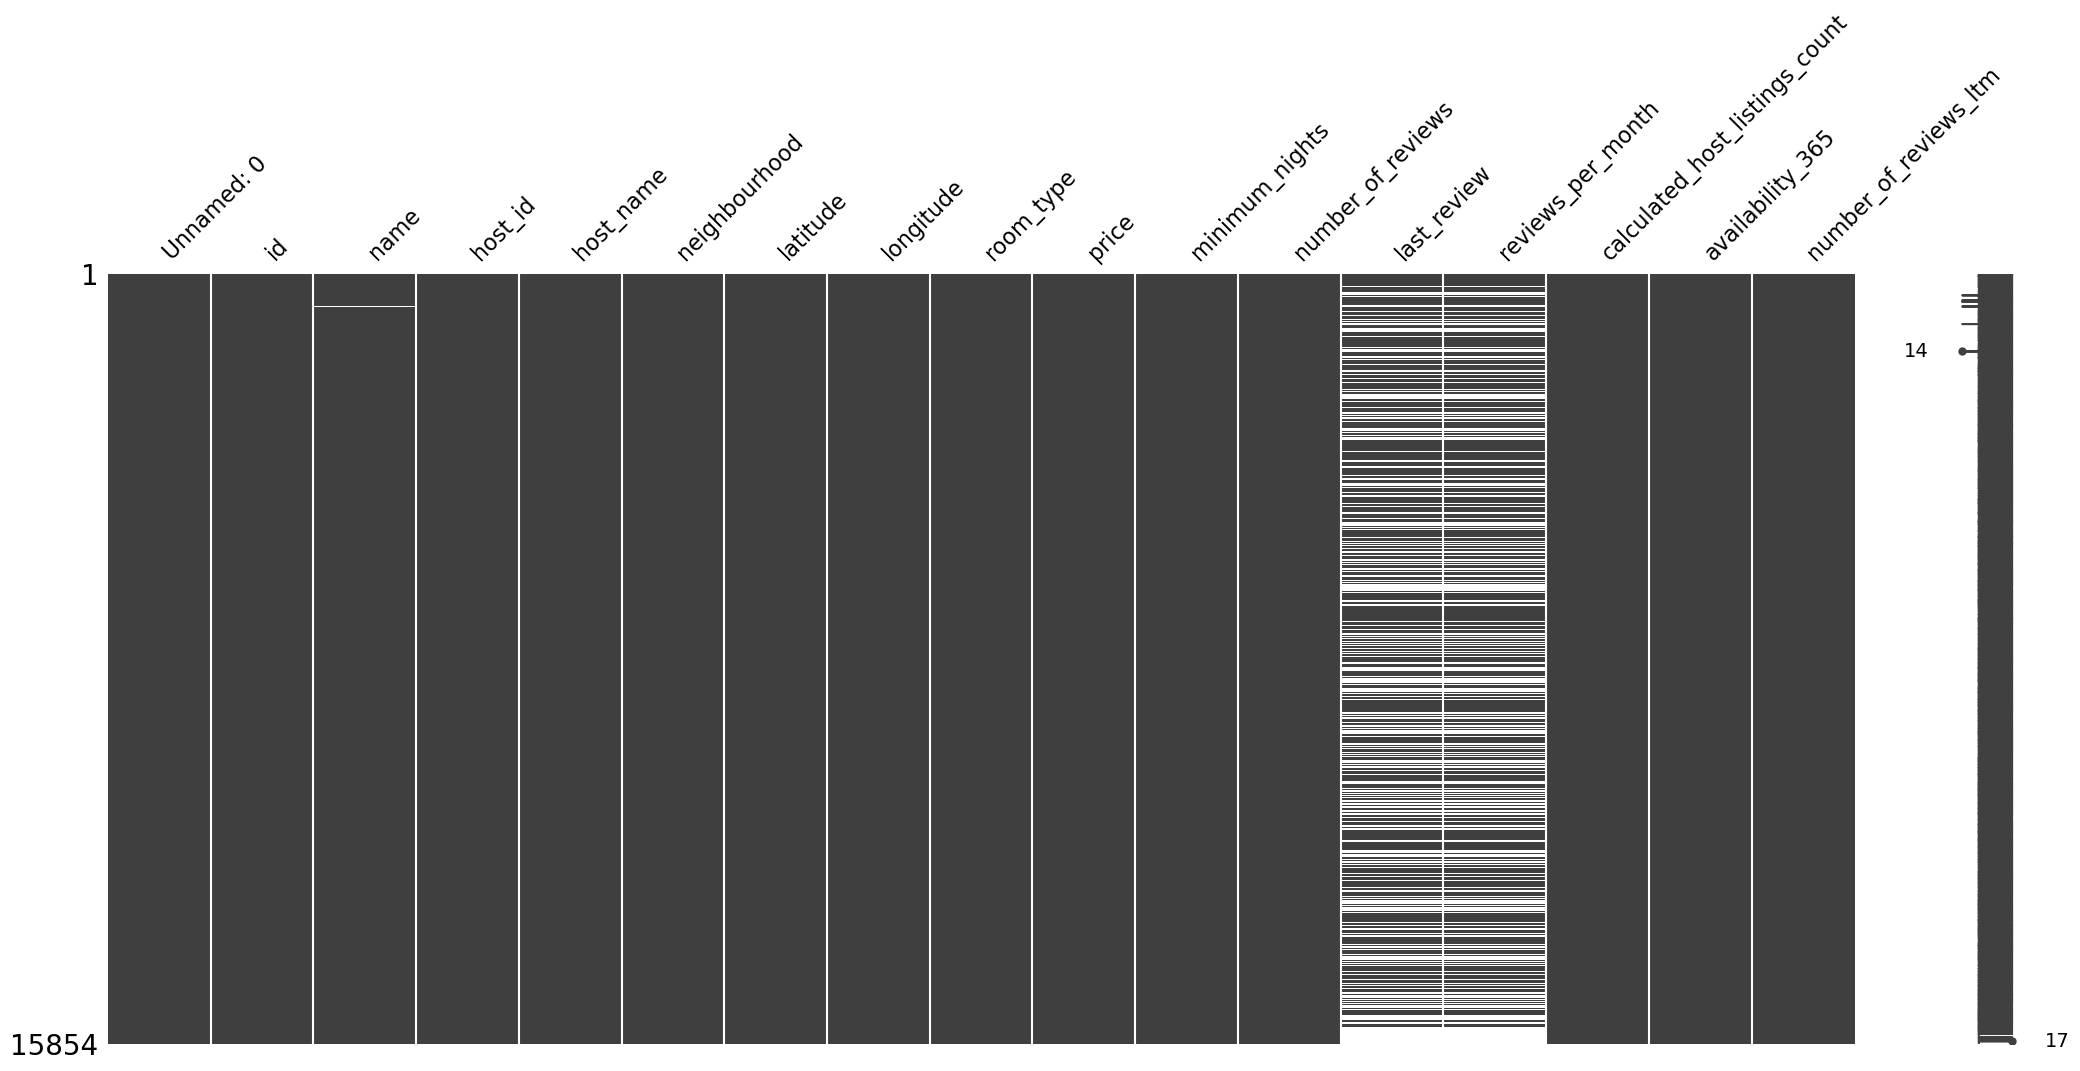

In [12]:
# Hubungan antar missing values secara visualisasi
missingno.matrix(sampledata)

1. Kolom dengan Nilai Hilang (NaN):
    - name: Kolom ini tampaknya **memiliki beberapa nilai yang hilang**, namun jumlahnya relatif kecil dibandingkan dengan total entri dalam dataset. Ini terlihat dari adanya garis tipis yang tidak terisi di baris-baris atas, atau dari jumlah angka yang didapatkan sebelumnya sebesar 0.5% dari jumlah data atau sebanyak 8baris yang tidak memiliki nilai pada kolom name

    - last_review: Kolom ini **memiliki banyak nilai yang hilang**, terlihat dari banyaknya garis vertikal kosong yang mencakup sebagian besar baris dalam grafik.

    - reviews_per_month: Kolom ini juga **memiliki banyak nilai yang hilang**, dan pola ini sejalan dengan kolom last_review, yang menunjukkan bahwa ketika last_review hilang, reviews_per_month kemungkinan besar juga hilang. Hal ini juga diperkuat dengan angka yang diperoleh dari data sebelum memvisualkan melalui grafik terdapat 5790 baris yang tidak memiliki nilai pada kolom last_review dan reviews_per_month, atau masing-masing kolom memiliki presentase 36.52%


2. Kolom Tanpa Nilai Hilang
    - Kolom-kolom seperti id, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, calculated_host_listings_count, dan availability_365 terlihat tidak memiliki nilai yang hilang. Ini bisa dilihat dari warna gelap yang sepenuhnya mengisi kolom-kolom ini.


3. Pola Missing Values
    - Kolom last_review dan reviews_per_month: Kedua kolom ini menunjukkan pola yang serupa dalam hal missing values, yang mengindikasikan hubungan kuat antara kedua kolom tersebut. Jika listing tidak memiliki ulasan, masuk akal bahwa tidak ada tanggal ulasan terakhir, sehingga kedua kolom ini kosong.


**Analisis**

- Menghapus kolom 'Unamed: 0' dari table
- name: Karena jumlah nilai yang hilang kecil, Anda bisa mempertimbangkan untuk mengisi nilai yang hilang ini dengan string seperti 'Unknown' atau 'Unnamed', atau bahkan menghapus baris ini jika diperlukan.

- last_review dan reviews_per_month: Nilai yang hilang menunjukkan bahwa listing belum pernah diulas
     - Untuk mengisi kolom reviews_per_month dengan 0 
    - Untuk mengisi kolom last_review dengan nilai seperti 'No Reviews' 

#### Menghapus Kolom 'Unnamed: 0'

In [13]:
# Menghapus data kolom 'Unnamed: 0' dan menyimpan pada variabel baru yaitu 'databersih'
sampledata_sementara = sampledata.drop('Unnamed: 0', axis = 1)

# Menampilkan
sampledata_sementara.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


#### Mengganti nilai NaN pada kolom 'name' 

In [14]:
# Mengganti nilai NaN yang ada pada list data menjadi bernilai 'Unnamed'
sampledata_sementara['name'].fillna('Unnamed', inplace=True)

/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/3825207803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampledata_sementara['name'].fillna('Unnamed', inplace=True)


#### Mengganti nilai NaN pada kolom 'host_name' menjadi bernilai *No Host*

In [15]:
# Mengganti nilai NaN yang ada pada list data menjadi bernilai 'No Named'
sampledata_sementara['host_name'].fillna('No Named',inplace=True)

/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/2182776089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampledata_sementara['host_name'].fillna('No Named',inplace=True)


#### Mereplace nilai NaN pada kolom 'last_review'

In [16]:
sampledata_sementara['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15854 entries, 0 to 15853
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
10064 non-null  object
dtypes: object(1)
memory usage: 124.0+ KB


Selanjutnya kita rubah menjadi format date time untuk kolom last_review

In [17]:
#Merubah format dari awalnya object menjadi date time pada kolom 'last_review'
sampledata_sementara['last_review'] = pd.to_datetime(sampledata_sementara['last_review'])

In [18]:
#Melakukan verifikasi
sampledata_sementara['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15854 entries, 0 to 15853
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
10064 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 124.0 KB


untuk kolom last_review telah berubah menjadi format date time, selanjutnya kita sekarang melakukan handling pada nilai NaT yang terdapat pada kolom last_review

In [19]:
# Memfilter data di mana last_review adalah NaT
nat_data = sampledata_sementara[sampledata_sementara['last_review'].isna()]


In [20]:
# Menampilkan tabel dengan last_review (NaT) dan availability_365
nat_availability_table = nat_data[['last_review', 'availability_365']]


In [21]:
# Atau jika Anda ingin menampilkan seluruh tabel dalam output
nat_availability_table


,last_review,availability_365
1,NaT,358
2,NaT,365
4,NaT,365
7,NaT,365
14,NaT,365
...,...,...
15849,NaT,362
15850,NaT,365
15851,NaT,365
15852,NaT,365


Kali ini kita mengisi nilai NaT dengan tanggal yang sangat jauh atau lampau agar dapat dengan mudah membedakannya bahwa kolom dengan tanggal yang sangat jauh atau lampau ini sebenarnya data yang tidak memiliki ulasan review, hal ini bisa saja masuk akal karena jumlah ketersediaan kamar yang memiliki nilai last_review NaT pada satu tahun tersebut masih banyak tersedia, sehingga kemungkinan besar tidak dikunjungi atau dikunjungi dengan tidak memberikan ulasan atau review

Dalam pandas ketika kita memasukan tahun sebelum 1678 akan eror, sehingga pilih tanggal setelah tahun 1678, seperti 1900an

Kita ganti nilai NaT dengan tanggal lampau seperti '1900-01-01'

In [22]:
# Mengisi NaT dengan tanggal 1 Januari 1900
sampledata_sementara['last_review'].fillna(pd.to_datetime('1900-01-01,'), inplace=True)


/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/1054159363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampledata_sementara['last_review'].fillna(pd.to_datetime('1900-01-01,'), inplace=True)


In [23]:
#Melakukan verifikasi apakah data NaT telah terisi atau belum
sampledata_sementara

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,1900-01-01,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1900-01-01,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,1900-01-01,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1900-01-01,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,1900-01-01,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,1900-01-01,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,1900-01-01,NaN,14,365,0


#### Mereplace nilai NaN pada kolom 'reviews_per_month'

In [24]:
# Mengganti nilai NaN yang ada pada list data menjadi angka '0'
sampledata_sementara['reviews_per_month'].fillna(0, inplace=True)


/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/575966484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampledata_sementara['reviews_per_month'].fillna(0, inplace=True)


In [25]:
#Melakukan verifikasi apakah data NaT telah terisi atau belum
sampledata_sementara

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,1900-01-01,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1900-01-01,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,1900-01-01,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1900-01-01,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,1900-01-01,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,1900-01-01,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,1900-01-01,0.00,14,365,0


In [26]:
# Memeriksa setiap kolom dalam DataFrame apakah terdapat nilai NaN atau NaT sudah tidak ada
#Dibuat dataframe untuk yang terdapat nilai NaN

#Mencari jumlah baris data
total_baris_data = len(sampledata_sementara)

# Membuat DataFrame kosong untuk menyimpan hasil
missing = pd.DataFrame({'Jumlah':sampledata_sementara.isnull().sum().sort_values(ascending=False)})

#Menambahkan jumlah persen kedalam dataframe
missing['Persentase']= round((missing['Jumlah']/total_baris_data)*100,2)
missing

,Jumlah,Persentase
id,0,0.0
name,0,0.0
host_id,0,0.0
host_name,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
minimum_nights,0,0.0


Selanjutnya setelah tidak ada data NaN atau NaT, bisa dilanjutkan kepada tahap selanjutnya yaitu melakukan pengecekan terhadap distribusi data yang ada pada data airbnb ini. 

## Numerik

## Statistika Deskriptif

In [27]:
# Statistik deskriptif untuk kolom numerik
sampledata_sementara.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,1977-03-25 20:48:26.522013376,0.516178,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,1900-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,1900-01-01 00:00:00,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2020-01-12 00:00:00,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-11-22 00:00:00,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,0.952753,30.269848,125.843224,8.916937


## Visualisasi Data (Explorasi Awal)

<Axes: xlabel='number_of_reviews_ltm', ylabel='Count'>

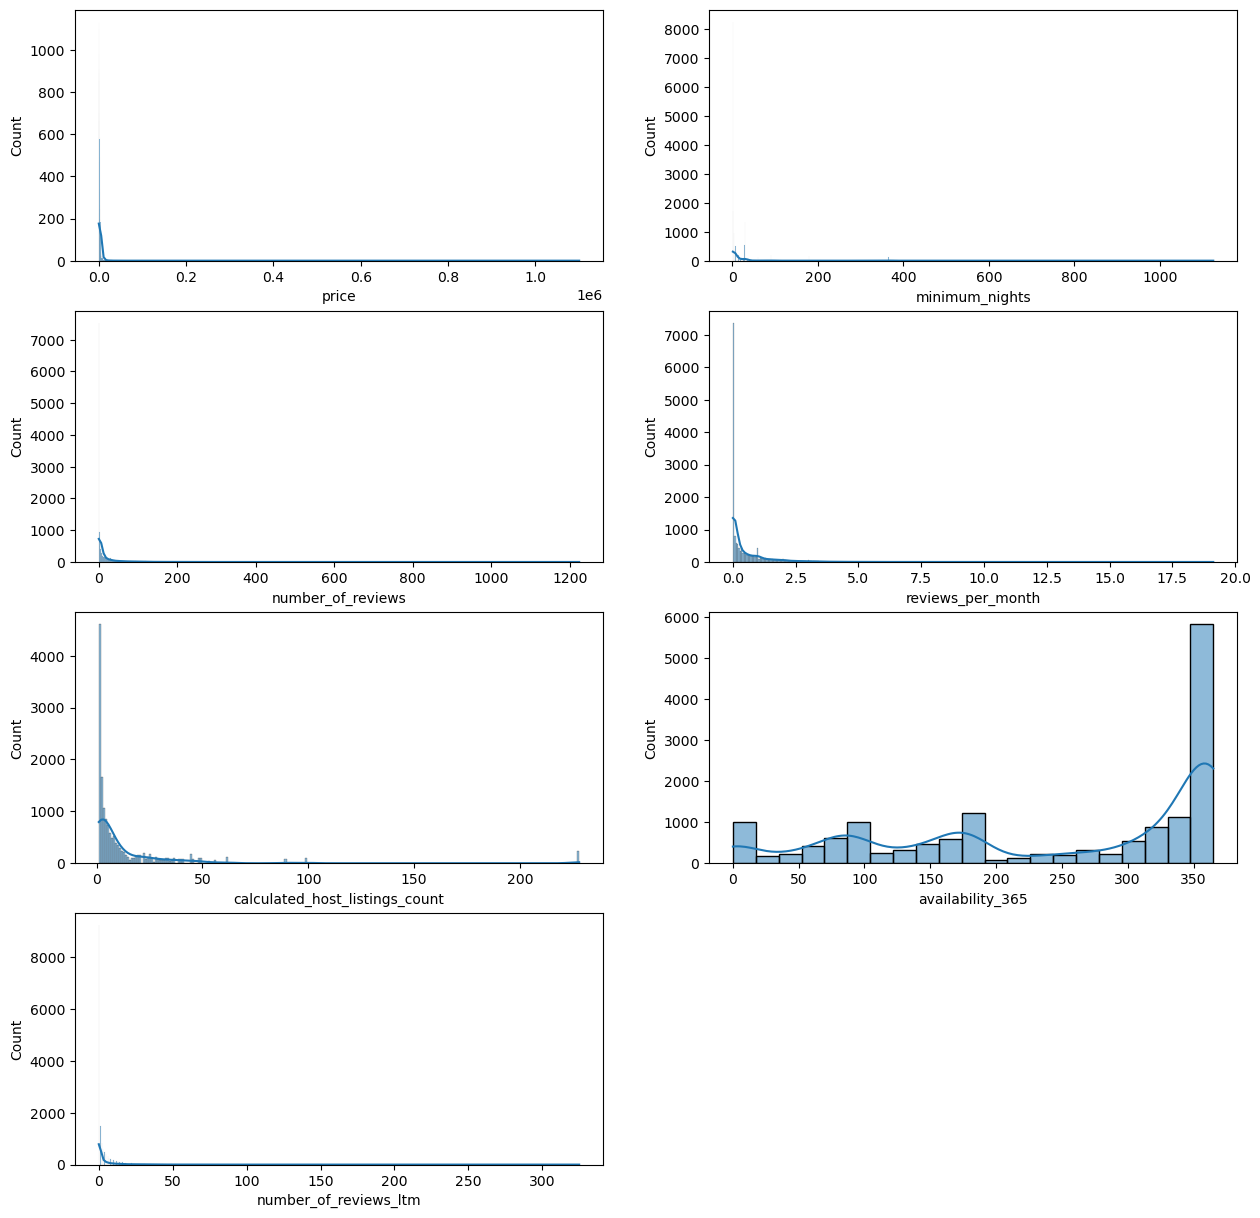

In [28]:
# Menentukan ukuran figur (wadah grafik)
plt.figure(figsize=(15,15))

plt.subplot(4,2,1) # baris, kolom, posisi
sns.histplot(sampledata_sementara['price'], kde = True)

plt.subplot(4,2,2) # baris, kolom, posisi
sns.histplot(sampledata_sementara['minimum_nights'], kde = True)

plt.subplot(4,2,3) # baris, kolom, posisi
sns.histplot(sampledata_sementara['number_of_reviews'], kde = True)

plt.subplot(4,2,4) # baris, kolom, posisi
sns.histplot(sampledata_sementara['reviews_per_month'], kde = True)

plt.subplot(4,2,5) # baris, kolom, posisi
sns.histplot(sampledata_sementara['calculated_host_listings_count'], kde = True)

plt.subplot(4,2,6) # baris, kolom, posisi
sns.histplot(sampledata_sementara['availability_365'], kde = True)

plt.subplot(4,2,7) # baris, kolom, posisi
sns.histplot(sampledata_sementara['number_of_reviews_ltm'], kde = True)

- price (Harga per Malam)
    - Distribusi: Distribusi harga sangat skewed ke kanan (right-skewed). Mayoritas listing memiliki harga yang rendah, namun ada sedikit listing dengan harga yang sangat tinggi, yang menyebabkan ekor panjang di sisi kanan.
    - Implikasi: Ada beberapa outlier dengan harga yang jauh lebih tinggi daripada mayoritas. Hal ini mungkin menunjukkan listing premium atau kesalahan dalam data.

- minimum_nights (Jumlah Malam Minimum)
    - Distribusi: Distribusi ini juga skewed ke kanan. Sebagian besar listing memiliki persyaratan malam minimum yang sangat rendah (1-2 malam), tetapi ada beberapa listing dengan persyaratan malam minimum yang sangat tinggi.
    - Implikasi: Sebagian besar listing di Bangkok mungkin disewakan untuk waktu yang singkat, tetapi beberapa host mungkin mencoba menghindari penyewa jangka pendek dengan menetapkan minimum nights yang tinggi.

- number_of_reviews (Jumlah Ulasan)
    - Distribusi: Histogram ini menunjukkan distribusi yang sangat skewed ke kanan. Mayoritas listing hampir tidak mendapatkan ulasan per bulan, sementara hanya sedikit yang mendapatkan ulasan secara teratur.
    - Implikasi: Aktivitas pengguna di Airbnb sangat bervariasi, dengan beberapa listing yang aktif mendapatkan ulasan, sementara yang lain hampir tidak mendapatkan ulasan.

- calculated_host_listings_count (Jumlah Listing per Host)
    - Distribusi: Distribusi skewed ke kanan. Sebagian besar host memiliki hanya beberapa listing, tetapi ada beberapa host yang memiliki puluhan atau bahkan lebih dari 200 listing.
    - Implikasi: Beberapa host mungkin adalah manajer properti profesional atau perusahaan yang memiliki banyak listing, sementara kebanyakan host mungkin adalah pemilik individu dengan 1-2 properti.

- availability_365 (Ketersediaan dalam 365 Hari)
     - Distribusi: Distribusi ini multi-modus dengan beberapa puncak. Ada puncak besar di sekitar 365 hari, menunjukkan banyak listing yang tersedia sepanjang tahun.
    - Implikasi: Banyak host yang membiarkan listing mereka tersedia sepanjang tahun. Puncak-puncak lainnya mungkin menunjukkan strategi ketersediaan yang lebih terbatas atau musiman.

- number_of_reviews_ltm (Jumlah Ulasan dalam 12 Bulan Terakhir)
    - Distribusi: Distribusi ini juga skewed ke kanan. Sebagian besar listing memiliki sedikit atau bahkan tidak ada ulasan dalam 12 bulan terakhir, tetapi ada beberapa yang memiliki jumlah ulasan yang sangat tinggi.
    - Implikasi: Aktivitas di Airbnb tampaknya tidak merata, dengan hanya beberapa listing yang sangat aktif dalam menerima ulasan baru-baru ini.

**Kesimpulan Grafik Histogram**

- Skewness: Sebagian besar distribusi data dalam dataset ini sangat skewed ke kanan, yang menunjukkan bahwa ada konsentrasi besar data di nilai rendah dengan ekor panjang di nilai tinggi.

- Outliers: Kehadiran outliers pada beberapa variabel, seperti price, minimum_nights, dan number_of_reviews, mengindikasikan bahwa ada beberapa listing yang sangat berbeda dari mayoritas. Ini penting untuk diingat saat melakukan analisis lebih lanjut.

- Analisis Lanjutan: Anda mungkin ingin mempertimbangkan metode penanganan outliers atau transformasi data (seperti log transform) untuk variabel-variabel yang sangat skewed sebelum melanjutkan ke analisis statistik atau pemodelan yang lebih dalam.

## Uji Statistika

pada data ini kita melanjutkan pada pengujian statistika untuk mengetahui persebaran distribusi data yang ada. Karena sudah menghandling data NaN dan NaT, dilanjutkan untuk mencari apakah data ini memiliki distribusi normal atau tidak normal

Pada pengujian ini kita menggunakannakan 4 metode yaitu Kolmogorov-Smirnov (K-S) Test, Shapiro-Wilk Test, Lilliefors Test, D'Agostino-Pearson Test.

### Kolmogorov-Smirnov (K-S) Test

In [29]:
numerik = sampledata_sementara.select_dtypes(include='number')

# List untuk menyimpan hasil
hasil_ks_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = kstest(sampledata_sementara[kolom], 'norm')
    
    # Menyimpan hasil untuk setiap kolom
    hasil_ks_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })
    

# Mengonversi hasil menjadi DataFrame
hasil_ks_test = pd.DataFrame(hasil_ks_test)

# Menampilkan DataFrame hasil
hasil_ks_test



,Kolom,Statistic,p-value,Normalitas
0,id,1.000000,0.0,Tidak Normal
1,host_id,1.000000,0.0,Tidak Normal
2,latitude,1.000000,0.0,Tidak Normal
3,longitude,1.000000,0.0,Tidak Normal
4,price,0.999937,0.0,Tidak Normal
5,minimum_nights,0.841345,0.0,Tidak Normal
6,number_of_reviews,0.502480,0.0,Tidak Normal
7,reviews_per_month,0.500000,0.0,Tidak Normal
8,calculated_host_listings_count,0.841345,0.0,Tidak Normal
9,availability_365,0.941560,0.0,Tidak Normal


### Shapiro-Wilk Test

In [30]:
# List untuk menyimpan hasil
hasil_sw_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = shapiro(sampledata_sementara[kolom])
    
    # Menyimpan hasil untuk setiap kolom
    hasil_sw_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_sw_test = pd.DataFrame(hasil_sw_test)

# Menampilkan DataFrame hasil
hasil_sw_test

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15854.
  res = hypotest_fun_out(*samples, **kwds)


,Kolom,Statistic,p-value,Normalitas
0,id,0.540362,1.008841e-107,Tidak Normal
1,host_id,0.903281,3.908625e-71,Tidak Normal
2,latitude,0.903401,4.151926e-71,Tidak Normal
3,longitude,0.952203,4.013954e-57,Tidak Normal
4,price,0.044419,1.439680e-127,Tidak Normal
5,minimum_nights,0.279777,1.065233e-119,Tidak Normal
6,number_of_reviews,0.441043,7.343043e-113,Tidak Normal
7,reviews_per_month,0.579111,1.892728e-105,Tidak Normal
8,calculated_host_listings_count,0.417426,5.799850e-114,Tidak Normal
9,availability_365,0.832346,3.634561e-83,Tidak Normal


### Lilliefors Test

In [31]:

# List untuk menyimpan hasil
hasil_lf_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = lilliefors(sampledata_sementara[kolom])
    
    # Menyimpan hasil untuk setiap kolom
    hasil_lf_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_lf_test = pd.DataFrame(hasil_lf_test)

# Menampilkan DataFrame hasil
hasil_lf_test

,Kolom,Statistic,p-value,Normalitas
0,id,0.478817,0.001,Tidak Normal
1,host_id,0.124909,0.001,Tidak Normal
2,latitude,0.121300,0.001,Tidak Normal
3,longitude,0.065415,0.001,Tidak Normal
4,price,0.453116,0.001,Tidak Normal
5,minimum_nights,0.389255,0.001,Tidak Normal
6,number_of_reviews,0.340879,0.001,Tidak Normal
7,reviews_per_month,0.293987,0.001,Tidak Normal
8,calculated_host_listings_count,0.335118,0.001,Tidak Normal
9,availability_365,0.205549,0.001,Tidak Normal


### D'Agostino-Pearson Test

In [32]:
# List untuk menyimpan hasil
hasil_dp_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = normaltest(sampledata_sementara[kolom])
    
    # Menyimpan hasil untuk setiap kolom
    hasil_dp_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_dp_test = pd.DataFrame(hasil_dp_test)

# Menampilkan DataFrame hasil
hasil_dp_test

,Kolom,Statistic,p-value,Normalitas
0,id,2897.533952,0.000000e+00,Tidak Normal
1,host_id,1416.301249,2.845060e-308,Tidak Normal
2,latitude,4357.584559,0.000000e+00,Tidak Normal
3,longitude,2077.697827,0.000000e+00,Tidak Normal
4,price,43049.944446,0.000000e+00,Tidak Normal
5,minimum_nights,22191.920998,0.000000e+00,Tidak Normal
6,number_of_reviews,19164.706395,0.000000e+00,Tidak Normal
7,reviews_per_month,15622.279800,0.000000e+00,Tidak Normal
8,calculated_host_listings_count,16475.886965,0.000000e+00,Tidak Normal
9,availability_365,12899.894275,0.000000e+00,Tidak Normal


## Outlier

### Memvisualkan Menggunakan Boxplot

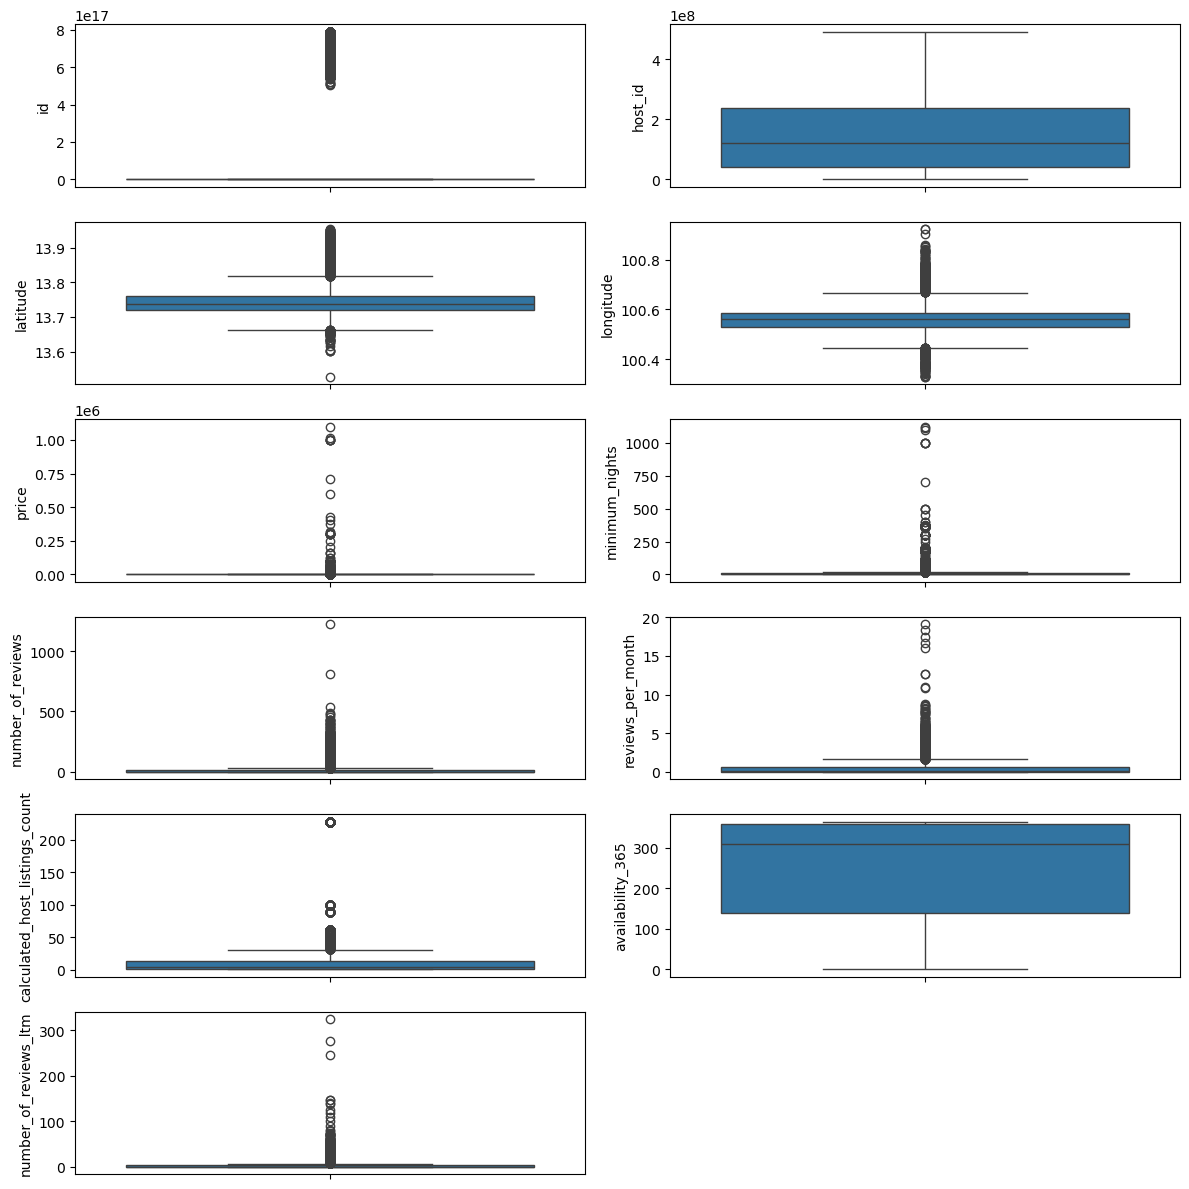

In [33]:
numerik = sampledata_sementara.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (12,12))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(6,2,posisi)
    sns.boxplot(sampledata_sementara[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

**id, host_id, latitude dan longitude**

Untuk kolom ini karna tidak terlalu berpengaruh atau data-data ini tidak kita gunakan dalam proses analisis selanjutnya, dapat tidak digunakan atau dapat tidak usah terlalu fokus pada kolom ini

**price**
   
 - Distribusi harga menunjukkan sejumlah besar outliers di sisi atas. Sebagian besar listing memiliki harga yang relatif rendah, dengan beberapa listing yang sangat mahal.

 - Outliers di price mungkin perlu ditinjau lebih lanjut untuk memahami apakah mereka mencerminkan listing premium atau kesalahan harga. Ini penting untuk analisis harga atau segmentasi berdasarkan tingkat harga.


**minimum_night**

- Ada beberapa outliers signifikan di sisi atas distribusi minimum_nights, menunjukkan bahwa beberapa host menetapkan jumlah malam minimum yang sangat tinggi.

- Ini bisa mencerminkan host yang ingin menghindari penyewa jangka pendek. Anda mungkin perlu mempertimbangkan bagaimana outliers ini mempengaruhi analisis lebih lanjut, terutama jika Anda ingin menganalisis durasi sewa.


**number_of_reviews**

- Sebagian besar listing memiliki sedikit ulasan, tetapi ada beberapa listing dengan jumlah ulasan yang sangat tinggi, yang muncul sebagai outliers.


- Outliers ini mungkin merupakan listing yang sangat populer atau lama yang telah mengumpulkan banyak ulasan. Ini penting untuk analisis popularitas atau tren ulasan.

**reviews_per_month**

- Sebagian besar listing hampir tidak menerima ulasan setiap bulan, dengan beberapa listing yang menerima ulasan secara teratur (muncul sebagai outliers).

- Anda mungkin ingin menganalisis lebih lanjut listing yang sangat aktif ini untuk memahami apa yang membuat mereka lebih menarik bagi penyewa.

**availability_365**

- Sebagian besar listing memiliki ketersediaan yang tinggi sepanjang tahun, dengan beberapa listing yang hanya tersedia untuk waktu yang terbatas.

- Ini bisa mencerminkan strategi yang berbeda di antara host dalam hal bagaimana mereka mengatur ketersediaan listing mereka. Outliers di sini mungkin listing yang sengaja hanya tersedia di waktu tertentu atau hanya digunakan oleh host mereka sendiri untuk sebagian besar tahun.

**number_of_reviews_ltm**

- Sebagian besar listing memiliki sedikit ulasan dalam 12 bulan terakhir, dengan beberapa listing yang sangat aktif dan muncul sebagai outliers.

- Listing yang sangat aktif ini mungkin penting untuk dianalisis lebih lanjut untuk memahami pola keberhasilan atau popularitas.

**Kesimpulan dan Rekomendasi**

- Outliers: Sebagian besar variabel memiliki outliers yang signifikan, terutama dalam hal harga, minimum nights, dan jumlah ulasan. Outliers ini mungkin perlu diperiksa lebih lanjut untuk menentukan apakah mereka representatif atau perlu diatasi (misalnya, dengan transformasi data atau penghapusan outliers).

- Segmentasi Host: Distribusi calculated_host_listings_count menunjukkan adanya perbedaan antara host individu dan manajer properti profesional, yang bisa menjadi dasar untuk segmentasi lebih lanjut.

- Analisis Geografis: Outliers dalam latitude dan longitude bisa relevan jika Anda berencana melakukan analisis geografis, dan mungkin perlu diverifikasi untuk memastikan akurasi data.

### IQR

In [34]:
numerik = sampledata_sementara.select_dtypes(include = 'number')

list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})


,kolom,jumlah outliers
0,id,3571
1,host_id,0
2,latitude,1095
3,longitude,602
4,price,1403
5,minimum_nights,3168
6,number_of_reviews,2240
7,reviews_per_month,1471
8,calculated_host_listings_count,1832
9,availability_365,0


- Kolom id: Memiliki 3571 outliers. Ini mungkin karena id adalah pengidentifikasi unik untuk setiap listing, dan outliers di sini bisa saja terjadi karena id mungkin bukan metrik yang bermakna untuk dianalisis sebagai numerik. Ini lebih terkait dengan identitas unik setiap listing.

- Kolom latitude dan longitude: Memiliki masing-masing 1095 dan 602 outliers. Outliers pada kolom ini bisa mengindikasikan listing yang berada di luar area pusat atau bahkan kesalahan dalam input data.

- Kolom price: Dengan 1403 outliers, menunjukkan bahwa ada beberapa listing yang memiliki harga yang jauh lebih tinggi atau lebih rendah dibandingkan dengan mayoritas listing lainnya. Ini bisa mencerminkan properti mewah atau listing yang sangat murah.
Kolom minimum_nights: Memiliki 3168 outliers, menandakan bahwa ada banyak listing dengan minimum stay yang sangat panjang atau sangat pendek, yang mungkin tidak umum dalam pasar Airbnb.

- Kolom number_of_reviews, reviews_per_month, calculated_host_listings_count, number_of_reviews_ltm: Kolom-kolom ini juga menunjukkan jumlah outliers yang signifikan, yang bisa menunjukkan variasi yang besar dalam aktivitas host dan tingkat popularitas listing.

## Korelasi

### Spearman

<Axes: >

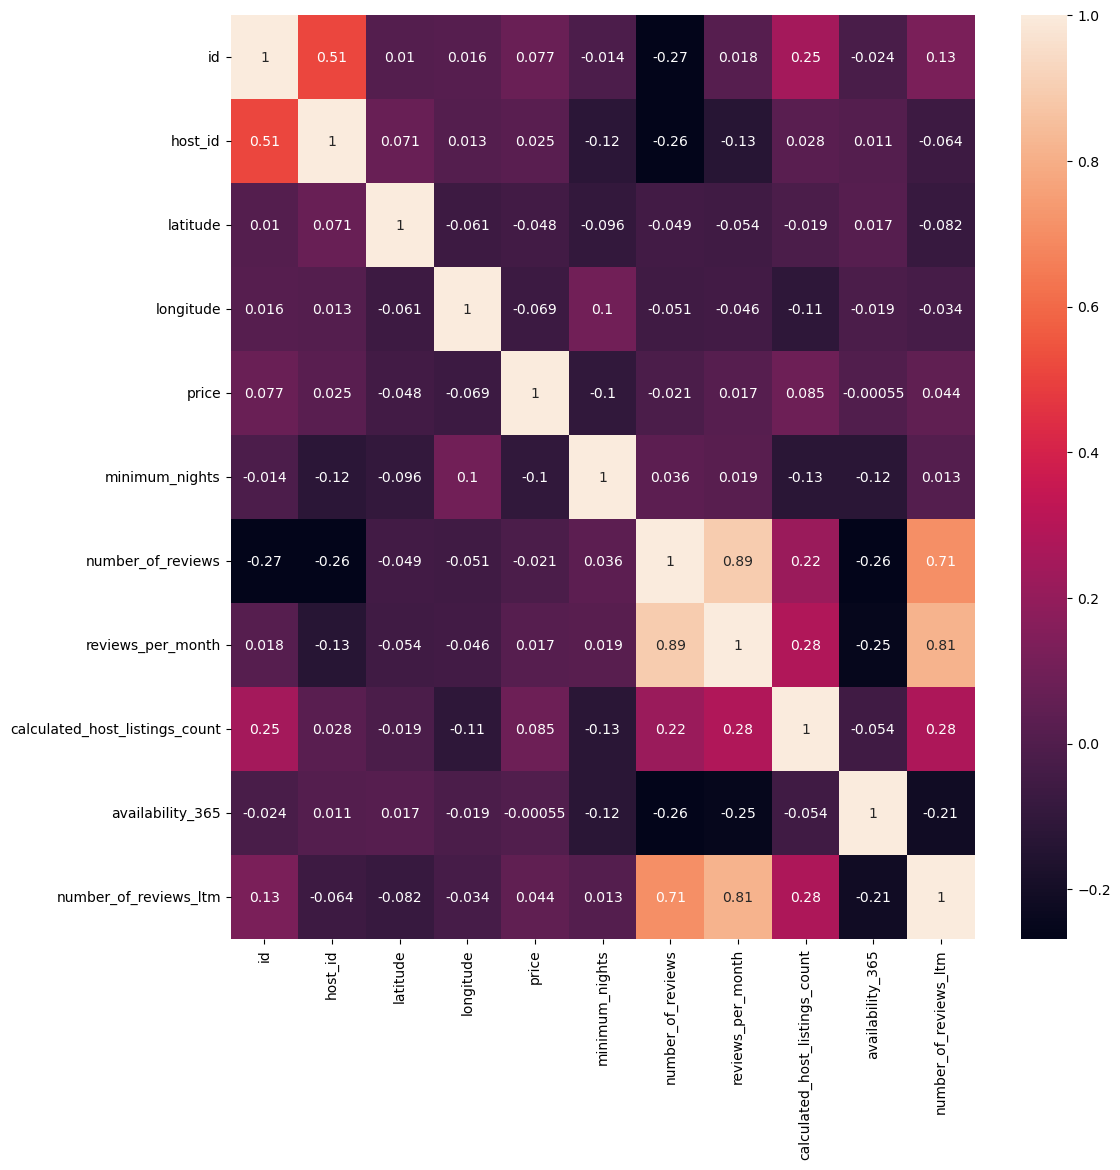

In [35]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (12,12))

sns.heatmap(numerik.corr(method = 'spearman'), annot=True)

- Heatmap ini menampilkan korelasi antara setiap pasangan kolom numerik dalam dataset. Warna pada heatmap menunjukkan kekuatan dan arah korelasi:

    - Warna Merah Muda hingga Putih: Menunjukkan korelasi positif yang kuat.
    - Warna Ungu hingga Hitam: Menunjukkan korelasi negatif atau korelasi yang sangat lemah.

- Korelasi Positif (Dekat dengan +1): Menunjukkan bahwa ketika satu variabel meningkat, variabel lainnya cenderung meningkat juga.

- Korelasi Negatif (Dekat dengan -1): Menunjukkan bahwa ketika satu variabel meningkat, variabel lainnya cenderung menurun.

- Korelasi Dekat dengan 0: Menunjukkan bahwa tidak ada hubungan linear yang kuat antara dua variabel tersebut.

### Korelasi Positif

**reviews_per_month dan number_of_reviews (0.89)**

- Interpretasi: Ada korelasi positif yang sangat kuat antara jumlah ulasan per bulan (reviews_per_month) dan total jumlah ulasan (number_of_reviews). Ini menunjukkan bahwa listing yang mendapatkan ulasan lebih banyak cenderung memiliki lebih banyak ulasan per bulan.
- Implikasi: Listing yang populer akan terus mendapatkan ulasan secara konsisten setiap bulan, sehingga dua variabel ini sangat terkait.

**reviews_per_month dan number_of_reviews_ltm (0.81)**

- Interpretasi: Korelasi kuat antara ulasan per bulan dan ulasan dalam 12 bulan terakhir (number_of_reviews_ltm). Ini masuk akal karena kedua variabel ini terkait dengan frekuensi ulasan yang diterima listing.

**number_of_reviews dan number_of_reviews_ltm (0.71)**
- Interpretasi: Korelasi positif yang kuat antara jumlah ulasan total dan jumlah ulasan dalam 12 bulan terakhir, menunjukkan bahwa listing yang sering mendapatkan ulasan cenderung mempertahankan tingkat ulasan yang tinggi sepanjang waktu.

**calculated_host_listings_count dengan number_of_reviews_ltm (0.28) dan reviews_per_month (0.28)**

- Interpretasi: Ada korelasi positif yang lemah hingga sedang antara jumlah listing yang dimiliki oleh host dan jumlah ulasan. Ini menunjukkan bahwa host dengan lebih banyak listing cenderung mendapatkan lebih banyak ulasan, meskipun korelasi ini tidak terlalu kuat.

### Korelasi Negatif yang Signifikan

**number_of_reviews dan id (-0.27)**

- Interpretasi: Korelasi negatif ini mungkin mengindikasikan bahwa listing yang lebih baru (memiliki id yang lebih besar) cenderung memiliki jumlah ulasan yang lebih sedikit. Listing lama cenderung memiliki lebih banyak ulasan, mungkin karena mereka sudah ada lebih lama di platform.

**availability_365 dengan number_of_reviews (-0.26) dan reviews_per_month (-0.26)**
- Interpretasi: Korelasi negatif ini menunjukkan bahwa listing yang tersedia sepanjang tahun (365 hari) cenderung mendapatkan lebih sedikit ulasan. Listing yang sering disewa mungkin memiliki lebih sedikit hari ketersediaan karena sering dipesan, sehingga mereka tidak tersedia sepanjang tahun.


### Korelasi Lemah atau Tidak Signifikan

Banyak kolom menunjukkan korelasi yang sangat lemah (dekat dengan 0), seperti price, latitude, dan longitude terhadap variabel lain. Ini menunjukkan bahwa variabel-variabel ini tidak memiliki hubungan linear yang signifikan dengan variabel lainnya dalam dataset ini.

### Kesimpulan

- Korelasi Kuat: Antara variabel yang terkait langsung dengan ulasan (number_of_reviews, reviews_per_month, number_of_reviews_ltm).

- Korelasi Negatif: Antara availability_365 dan jumlah ulasan menunjukkan bahwa listing yang lebih sering disewa cenderung tidak tersedia sepanjang tahun.

- Korelasi Lemah: Beberapa variabel seperti price, latitude, longitude, dan minimum_nights tidak menunjukkan hubungan linear yang kuat dengan variabel lainnya, yang bisa berarti bahwa faktor-faktor ini dipengaruhi oleh variabel-variabel lain yang tidak termasuk dalam dataset.

## Kategorik

### Analisis Statistika Deskriptif

In [36]:
sampledata_sementara.describe(include = 'object')

,name,host_name,neighbourhood,room_type
count,15854,15854,15854,15854
unique,14795,5313,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


### Unique Value / Kardinalitas

Melihat jumlah unique value dari setiap variabel kategorik

In [37]:
kategorik = sampledata_sementara.select_dtypes(include = 'object')

In [38]:
# menghitung jumlah unique value setiap variabel kategorik
pd.DataFrame(kategorik.nunique())

,0
name,14795
host_name,5313
neighbourhood,50
room_type,4


<Axes: >

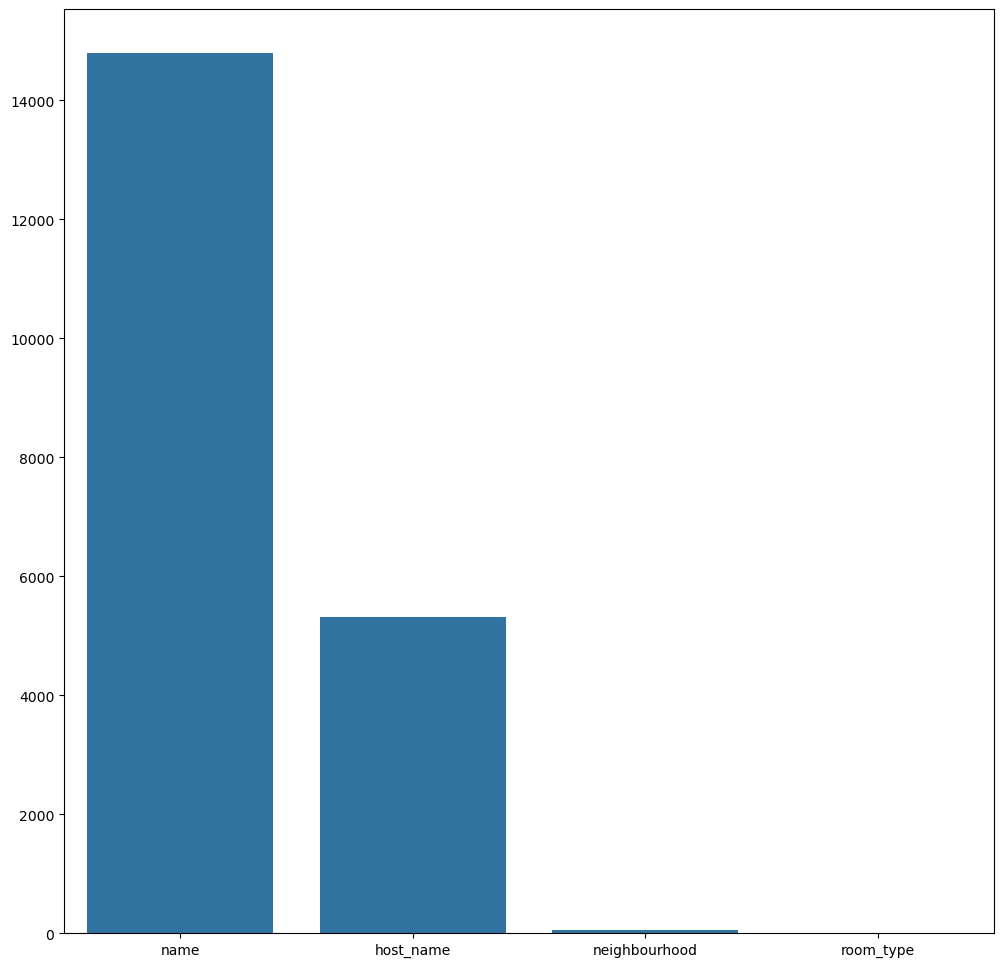

In [39]:
#Memvisualkan menggunakan barplot

plt.figure(figsize = (12,12))
sns.barplot(kategorik.nunique())

In [40]:
# Looping untuk setiap kolom dalam DataFrame
for kolom in kategorik:
    print(f"Frekuensi value counts untuk kolom '{kolom}':")
    print(sampledata_sementara[kolom].value_counts().head(10))  # Menampilkan 10 frekuensi tertinggi
    print("\n" + "="*40 + "\n")


Frekuensi value counts untuk kolom 'name':
name
New!  La Chada Night Market studio 2PPL near MRT      45
New!  La Chada Night Market 1BR 2PPL near MRT         35
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)    35
New! Gateway/ Bangkok University 1BR 2PPL near BTS    29
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS    25
1BR Twin Suit 2ppl/Surasak BTS Sathorn/Pool /WIFI     24
1BR Twin Suit 2ppl/Surasak BTS Sathorn/Pool /Wifi     21
Near The Grand Palace/ASOK Station/Sukhumvit          18
2BR！New! Near The Grand Palace/ASOK Station/4PPL      15
New!Near The Grand Palace/ASOK Station/4PPL           14
Name: count, dtype: int64


Frekuensi value counts untuk kolom 'host_name':
host_name
Curry       228
Noons        99
K            91
Pornchai     63
Bee          62
Alex         62
Dusadee      62
Ed           60
Nana         57
Ludoping     56
Name: count, dtype: int64


Frekuensi value counts untuk kolom 'neighbourhood':
neighbourhood
Vadhana         2153
Khlong Toei     2097


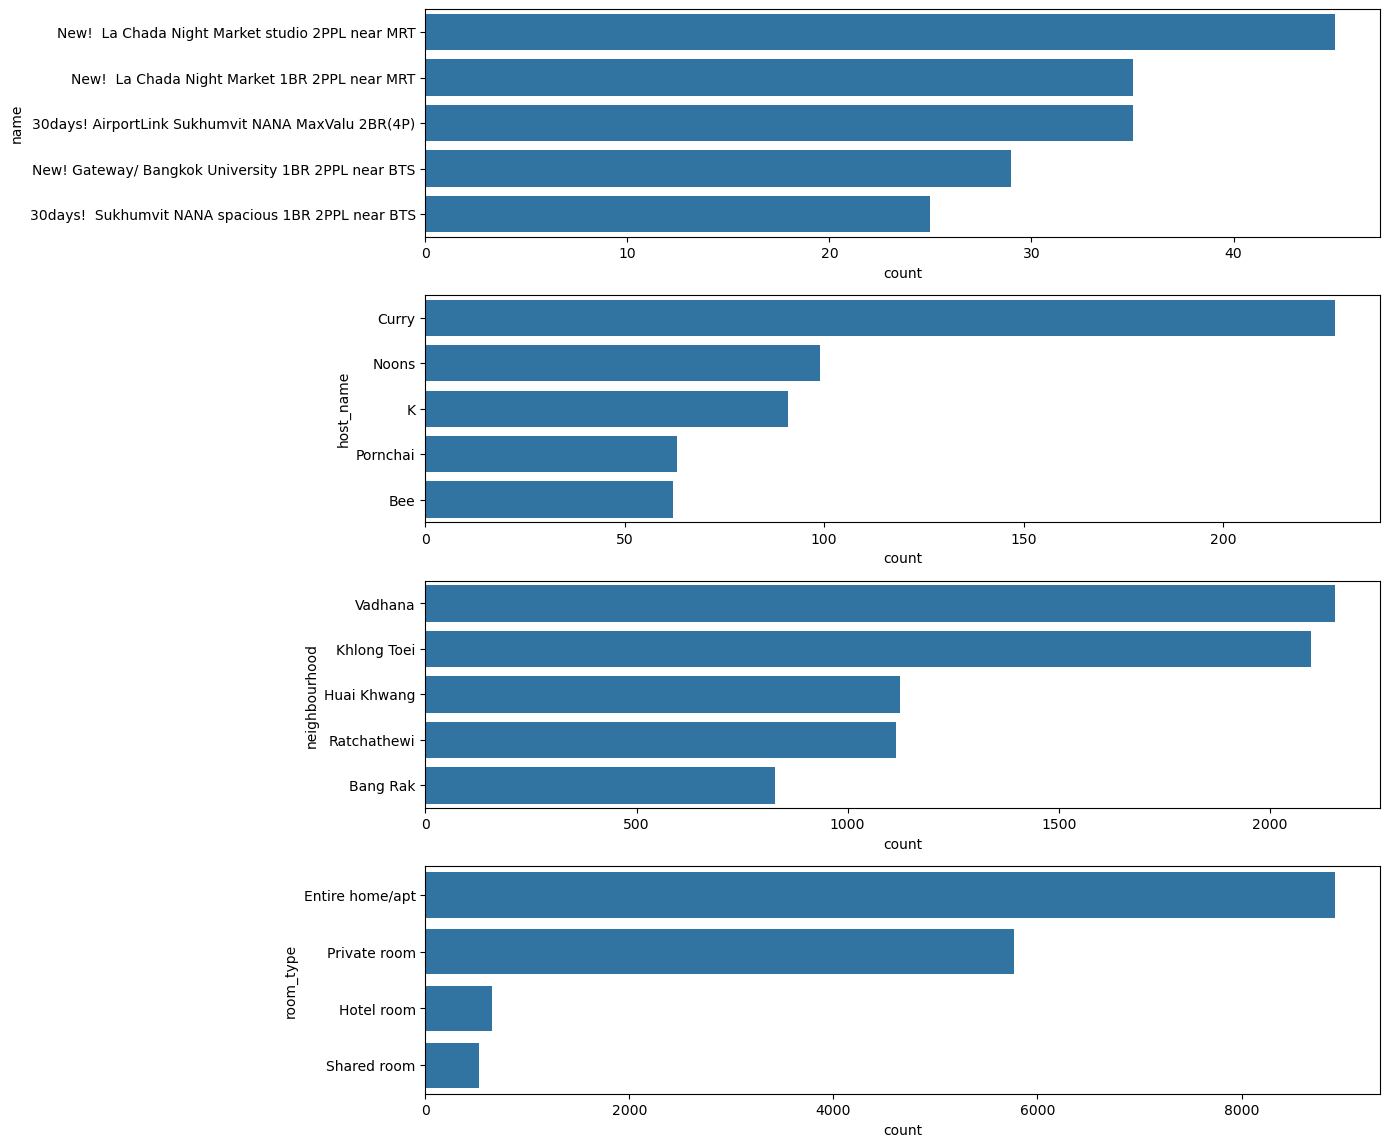

In [41]:
#Melakukan visualisasi nunique kategorik

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (14,14)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(5,1,posisi)
    sns.barplot(sampledata_sementara[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

**name (Nama Listing)**

- Beberapa listing seperti "New! La Chada Night Market studio 2PPL near MRT" dan "New! La Chada Night Market 1BR 2PPL near MRT" muncul beberapa kali dengan frekuensi tinggi.

- Ini bisa menunjukkan bahwa listing ini sangat populer atau mungkin listing tersebut dibuat lebih dari sekali dengan variasi yang sedikit.

- Listing yang sering muncul ini bisa menjadi fokus analisis lebih lanjut untuk memahami apa yang membuatnya lebih populer dibandingkan listing lain. Anda mungkin ingin meneliti faktor-faktor seperti harga, lokasi, ulasan, dan fasilitas yang disediakan.

**host_name (Nama Host)**

- Host dengan nama "Curry" memiliki jumlah listing yang sangat banyak, diikuti oleh "Noons" dan "K".

- Host ini mungkin adalah manajer properti profesional atau seseorang yang memiliki beberapa properti di platform.

- Analisis lebih lanjut bisa dilakukan untuk melihat bagaimana host ini mengelola properti mereka, strategi harga, dan ulasan yang mereka terima. Ini bisa memberikan wawasan bagi host lain atau bagi Airbnb dalam memberikan dukungan yang tepat kepada host yang sangat aktif.

**neighbourhood (Lingkungan/Daerah)**

- Lingkungan seperti "Vadhana" dan "Khlong Toei" memiliki jumlah listing yang sangat tinggi.

- Ini menunjukkan bahwa area tersebut mungkin merupakan lokasi yang sangat populer di Bangkok untuk menyewa properti Airbnb.

- Informasi ini bisa digunakan untuk menganalisis faktor-faktor yang membuat daerah-daerah ini populer, seperti aksesibilitas, fasilitas, dan daya tarik wisata. Ini juga bisa membantu dalam merancang strategi pemasaran yang lebih fokus untuk area tertentu.

**room_type (Tipe Kamar)**

- Tipe kamar "Entire home/apt" mendominasi jumlah listing, diikuti oleh "Private room". Tipe kamar "Hotel room" dan "Shared room" memiliki jumlah listing yang jauh lebih sedikit.

- Ini menunjukkan bahwa sebagian besar tamu lebih memilih menyewa seluruh rumah atau apartemen daripada hanya sebuah kamar.

- Informasi ini berguna untuk mengetahui preferensi tamu di Bangkok. Ini juga dapat membantu host untuk menyesuaikan jenis akomodasi yang mereka tawarkan, atau bagi Airbnb untuk fokus pada jenis properti yang paling diminati.

**last_review (Tanggal Ulasan Terakhir)**

- Sebagian besar listing memiliki status "No Reviews", menunjukkan bahwa banyak properti yang belum pernah menerima ulasan, atau belum ada ulasan yang diterima sejak listing dibuat.

- Tanggal ulasan lainnya menunjukkan bahwa ada beberapa properti yang menerima ulasan baru-baru ini pada bulan Desember 2022.

- Listing yang tidak memiliki ulasan mungkin baru atau kurang populer. Anda bisa menganalisis lebih lanjut apakah ini terkait dengan harga, lokasi, atau faktor lain.

- Untuk listing dengan ulasan terbaru, Anda bisa meneliti tren ulasan, apakah mereka positif atau negatif, dan apa yang bisa ditingkatkan dari listing yang belum menerima ulasan.

**Kesimpulan**

- Popularitas Listing dan Lokasi:

    - Lokasi populer seperti "Vadhana" dan "Khlong Toei" serta listing tertentu yang sering muncul dapat dianalisis lebih lanjut untuk memahami apa yang membuat mereka menarik. Ini dapat digunakan untuk mengarahkan strategi pemasaran atau pengelolaan listing.

- Strategi Host:
    - Host yang memiliki banyak listing seperti "Curry" mungkin memiliki strategi tertentu yang berhasil. Analisis tentang bagaimana mereka mengelola properti bisa bermanfaat bagi host lain.

- Preferensi Tamu:
    - Preferensi untuk "Entire home/apt" menunjukkan bahwa tamu lebih suka privasi dan kebebasan yang datang dengan menyewa seluruh tempat. Ini bisa menjadi fokus bagi host yang ingin meningkatkan permintaan untuk listing mereka.

- Analisis Ulasan:
    - Properti tanpa ulasan mungkin memerlukan strategi pemasaran yang berbeda atau peningkatan kualitas untuk menarik lebih banyak tamu dan mendapatkan ulasan. Sedangkan listing dengan ulasan terbaru perlu dianalisis untuk melihat umpan balik tamu.


# Data Cleaning

## Original Data

In [42]:
sampledata

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Pada tahap selanjutnya yaitu tahapan data cleaning, kita melakukan pembersihan data secara permanen. Perbersihan data ini dilakukan pada satu persatu kolom yang ada pada data listing airbnb. Pembersihan dapat dilakukan dengan cara, menghapus nilai NaN atau menghandling dengan mengganti nilai NaN menjadi Mean, Median ataupun Modus. Atau bisa juga diganti dengan menggunakan domain knowlage

In [43]:
# Memeriksa setiap kolom dalam DataFrame apakah terdapat nilai NaN
#Dibuat dataframe untuk yang terdapat nilai NaN

#Mencari jumlah baris data
total_baris_data = len(sampledata)

# Membuat DataFrame kosong untuk menyimpan hasil
missing = pd.DataFrame({'Jumlah':sampledata.isnull().sum().sort_values(ascending=False)})

#Menambahkan jumlah persen kedalam dataframe
missing['Persentase']= round((missing['Jumlah']/total_baris_data)*100,2)
missing

,Jumlah,Persentase
reviews_per_month,5790,36.52
last_review,5790,36.52
name,8,0.05
host_name,1,0.01
Unnamed: 0,0,0.00
minimum_nights,0,0.00
availability_365,0,0.00
calculated_host_listings_count,0,0.00
number_of_reviews,0,0.00
room_type,0,0.00


Kita disini memutuskan untuk tidak menghapus nilai NaN yang banyak pada kolom reviews_per_month dan last_review, dikarenakan kita disni ingin menggunakan kolom reviews_per_month ikut dalam analisis data kita selanjutnya, dan untuk kolom last_review kita berusaha mempertahankan karena kolom reviews_per_month dengan last_review memiliki korelasi yang sangat kuat.

Pada data cleaning ini, kita akan menyimpan semua data yang telah dibersihkan pada variable *'data_bersih'*

## Menghapus kolom 'Unnamed: 0' 

Menghapus kolom ini dilakukan karena tidak memiliki korelasi pada kolom yang lain.

In [44]:
# Menghapus data kolom 'Unnamed: 0' dan menyimpan pada variabel baru yaitu 'data_bersih'
data_bersih = sampledata.drop('Unnamed: 0', axis = 1)

# Menampilkan
data_bersih

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Menghapus Kolom id, name, host_id, host_name, latitude dan longitude, last_review, number_of_reviews_ltm

Pada proses penghapusan ini, tahapan ini melakukan penghapusan kolom id, name, host_id, host_name, latitude, longitude, last_review, number_of_reviews_ltm, dikarenakan kita dalam melakukan analisis sesuai dengan problom statement yang kita pilih tidak membutuhkan kolom-kol tersebut. 

Kolom - kolom yang tetap masih dipertahankan untuk melakukan proses analisis sesuai dengan problem statement yang telah dipilih adalah kolom yang kemungkinan besar memiliki pengaruh terhadap proses analisis adalah id, name, host_id, host_name, latitude, longitude, last_review, number_of_reviews_ltm.

In [45]:
#mendefinisikan kolom-kolom apa saja yang ingin dihapus dari dari data untuk analisis selanjutnya 'latitude', 'longitude',
dropcolums = ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review', 'number_of_reviews_ltm']

In [46]:
#Menghapus kolom yang telah didefisnisikan sebelumnya
data_bersih.drop(columns=dropcolums, axis=1,inplace=True)

In [47]:
#melakukan verifikasi data apakah kolom yang diharapkan dihapus sudah terhapus atau belum
data_bersih

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Ratchathewi,Entire home/apt,1905,3,65,0.50,2,353
1,Bang Na,Private room,1316,1,0,NaN,2,358
2,Bang Kapi,Private room,800,60,0,NaN,1,365
3,Din Daeng,Private room,1286,7,2,0.03,1,323
4,Bang Kapi,Private room,1905,1,0,NaN,3,365
...,...,...,...,...,...,...,...,...
15849,Pra Wet,Private room,2298,28,0,NaN,1,362
15850,Ratchathewi,Private room,1429,1,0,NaN,14,365
15851,Ratchathewi,Private room,1214,1,0,NaN,14,365
15852,Ratchathewi,Private room,1214,1,0,NaN,14,365


## neighbourhood

In [48]:
# Melihat nilai unik dalam kolom 'neighbourhood'
unique_neighbourhoods = data_bersih['neighbourhood'].unique()
pd.DataFrame(unique_neighbourhoods)


,0
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho laen
5,Rat Burana
6,Chatu Chak
7,Khlong San
8,Bang Rak
9,Phaya Thai


Dapat dilihat pada data yang dimilik terdapat total 50 daerah atau wilayah yang ada pada listing data airbnb

In [49]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'neighbourhood'
neighbourhood_counts = data_bersih['neighbourhood'].value_counts()
pd.DataFrame(neighbourhood_counts)

,count
neighbourhood,
Vadhana,2153
Khlong Toei,2097
Huai Khwang,1125
Ratchathewi,1114
Bang Rak,827
Sathon,809
Phra Nakhon,619
Phra Khanong,558
Chatu Chak,548


### Missing Values

Pada kolom neighbourhood ini tidak ditemukannya mising values dan tidak ada dilakukannya replace atau penghapusan data, dikarenakan data pada kolom ini sudah sesuai dan bersih, sehingga pada kolom ini sudah dapat digunakan dalam proses penganalisis'an nantinya

### Outliers

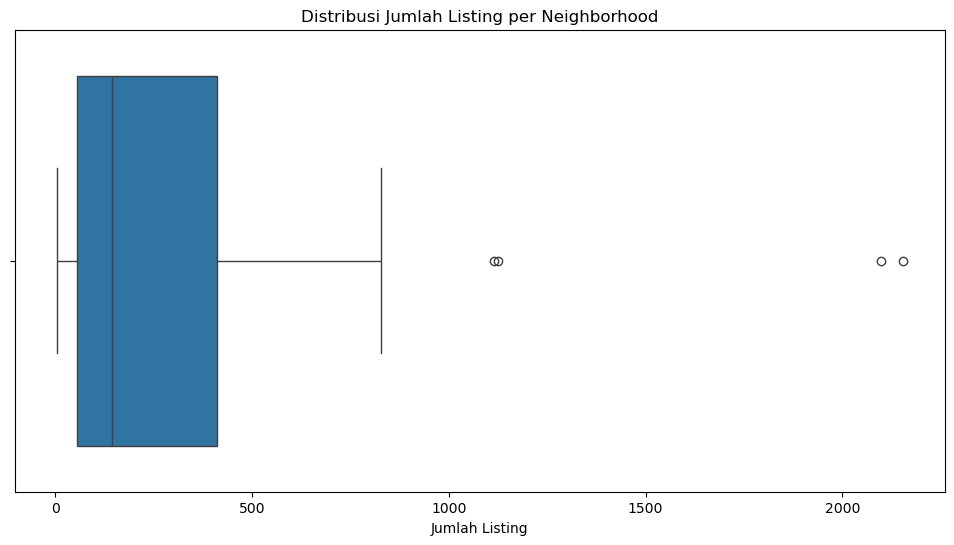

In [50]:
# Visualisasi distribusi neighborhood dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=neighbourhood_counts)
plt.title('Distribusi Jumlah Listing per Neighborhood')
plt.xlabel('Jumlah Listing')
plt.show()

**Visualisasi Distribusi**

- Kotak (Box): Bagian tengah dari boxplot (kotak) mewakili interquartile range (IQR), yang mencakup 50% dari data. Ini adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Bagian bawah dari kotak adalah Q1, dan bagian atas kotak adalah Q3.

- Garis Tengah (Median): Garis horizontal di dalam kotak menunjukkan median (Q2) dari data, yang merupakan nilai tengah dari data yang diurutkan.

**Rentang Nilai Normal**
- Garis (Whiskers): Garis horizontal yang keluar dari kotak ke kiri dan kanan disebut whiskers. Whiskers ini menunjukkan rentang data yang berada dalam 1,5 kali IQR dari Q1 dan Q3. Nilai-nilai yang berada di luar whiskers ini biasanya dianggap sebagai outliers.

**Identifikasi Outliers**
- Outliers (Lingkaran): Titik-titik di sebelah kanan whiskers adalah outliers. Ini adalah neighborhood yang memiliki jumlah listing yang jauh lebih tinggi dibandingkan dengan neighborhood lainnya. Outliers ini menandakan adanya beberapa neighborhood yang sangat populer atau memiliki banyak listing dibandingkan dengan yang lainnya.

**Interpretasi**
- Jumlah Listing Normal: Sebagian besar neighborhood memiliki jumlah listing yang berada dalam rentang yang cukup normal (terlihat dari kotak dan whiskers).

- Outliers yang Signifikan: Ada beberapa neighborhood yang memiliki jumlah listing yang sangat tinggi (sekitar 1500 hingga lebih dari 2000), yang ditunjukkan oleh titik-titik di sebelah kanan whiskers. Ini bisa mengindikasikan bahwa neighborhood tersebut sangat populer atau memiliki banyak host yang aktif.

In [51]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = neighbourhood_counts.quantile(0.25)
Q3 = neighbourhood_counts.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan neighborhood yang dianggap outliers
outliers = neighbourhood_counts[(neighbourhood_counts < lower_bound) | (neighbourhood_counts > upper_bound)]

# Menampilkan neighborhood yang dianggap outliers
pd.DataFrame(outliers)

,count
neighbourhood,
Vadhana,2153
Khlong Toei,2097
Huai Khwang,1125
Ratchathewi,1114


### Kesimpulan

telah dilakukan pengecekan terhadap outliers yang ada, untuk outliers ini tetap dipertahankan dikarenakan memang benar memiliki banyak sekali penginapan disana, dikarenakan daerah tersebut merupakan daerah yang ramai cukup sering dikunjungi oleh penduduk lokal ataupun wisatawan

**Berikut refrensi sebagai data pendukung bahwa outliers tersebut tidak perlu dihapus:**

- Vadhana: Distrik ini dikenal dengan kehidupan malam yang hidup dan area-area trendi, terutama di sekitar Thong Lo dan Ekkamai. Area ini dipenuhi dengan restoran mewah, bar, dan toko-toko butik. Vadhana juga merupakan rumah bagi pusat perbelanjaan besar seperti EmQuartier dan Terminal 21, yang menjadi daya tarik utama bagi penduduk lokal maupun wisatawan. Dengan banyaknya pusat perbelanjaan, restoran, dan hiburan di sekitar Sukhumvit, Vadhana menawarkan berbagai jenis penginapan mulai dari hotel bintang lima hingga hostel dan apartemen yang disewakan untuk jangka pendek​(
[Wikipedia](https://en.wikipedia.org/wiki/Watthana_district)
,
[PlanetWare](https://www.planetware.com/tourist-attractions-/bangkok-tha-bk-b.htm)
).

- Khlong Toei: Distrik ini memiliki situs budaya penting dan atraksi modern seperti Taman Benchasiri dan Pusat Sains untuk Pendidikan, yang mencakup planetarium dan akuarium. Distrik ini juga memiliki pasar lokal yang hidup seperti Pasar Khlong Toei, yang merupakan salah satu pasar segar terbesar di Bangkok​. Sebagai area yang dekat dengan atraksi budaya dan pasar lokal, Khlong Toei juga memiliki banyak penginapan, termasuk hotel-hotel yang melayani wisatawan dengan anggaran yang berbeda-beda(
[Trek Zone](https://trek.zone/en/thailand/places/491176/watthana-district-bangkok)
).

- Huai Khwang: Dikenal dengan pasar malam yang ramai, Huai Khwang adalah pusat makanan jalanan dan belanja lokal. Atraksi seperti Pasar Malam Ratchada Train dan Pusat Budaya Thailand populer di kalangan penduduk lokal dan wisatawan. Area ini juga dikenal dengan pertunjukan budaya seperti Niramit Bangkok, yang menampilkan warisan Thailand melalui pertunjukan​. Dengan pasar malam yang populer dan pusat budaya, Huai Khwang memiliki sejumlah hotel dan apartemen yang dirancang untuk menampung banyaknya pengunjung yang datang untuk menikmati hiburan malam dan budaya lokal(
[Travelodium](https://travelodium.com/things-to-do-in-huai-khwang-bangkok-thailand/)
,
[Tripadvisor](https://www.tripadvisor.com.ph/Attractions-g293916-Activities-zfn15620296-Bangkok.html)
).

- Ratchathewi: Lingkungan ini terletak strategis dekat dengan atraksi utama Bangkok seperti Siam Square, MBK Center, dan Rumah Jim Thompson, menjadikannya basis yang nyaman bagi wisatawan yang menjelajahi kota. Distrik ini menawarkan campuran antara mal perbelanjaan modern dan situs bersejarah. Lokasinya yang strategis dekat dengan atraksi-atraksi utama Bangkok menjadikan Ratchathewi sebagai area dengan banyak hotel, mulai dari penginapan mewah hingga penginapan yang lebih terjangkau​​(
[PlanetWare](https://www.planetware.com/tourist-attractions-/bangkok-tha-bk-b.htm)
).

## room_type

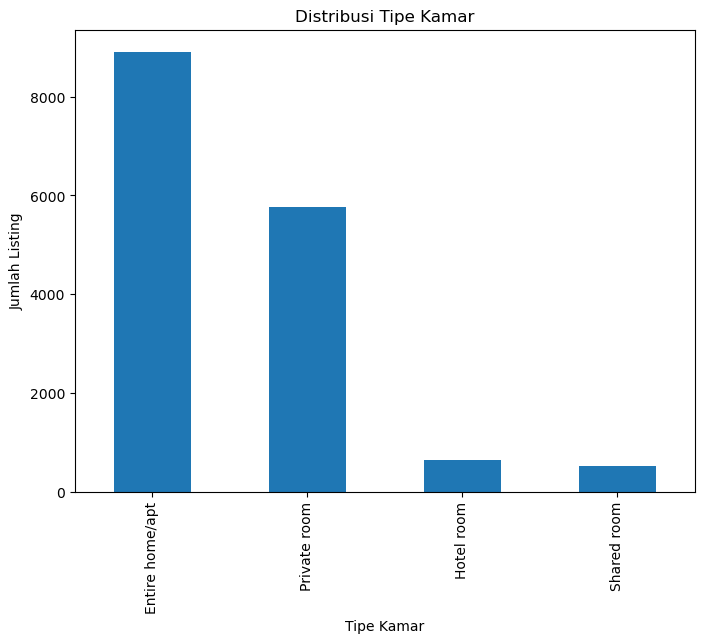

In [52]:
# Visualisasi distribusi tipe kamar
unique_room_types = data_bersih['room_type'].value_counts()
unique_room_types.plot(kind='bar', figsize=(8, 6))
plt.title('Distribusi Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.show()

### Mising Values

In [53]:
# Melihat nilai unik dalam kolom 'neighbourhood'
room_type_distribution = data_bersih['room_type'].unique()

pd.DataFrame(room_type_distribution)

,0
0,Entire home/apt
1,Private room
2,Hotel room
3,Shared room


In [54]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'neighbourhood'
room_type_distribution = data_bersih['room_type'].value_counts()
pd.DataFrame(room_type_distribution)


,count
room_type,
Entire home/apt,8912
Private room,5770
Hotel room,649
Shared room,523


pada kolom room_type ini tidak ditemukan adanya missing value atau NaN sehingga dapat dilanjutkan pada tahap selanjutnya pengecekan outliers untuk kolom room_type

### Outliers

In [55]:
# Menghitung proporsi setiap tipe kamar
room_type_proportions = room_type_distribution / room_type_distribution.sum()
pd.DataFrame(round(room_type_proportions*100.2))


,count
room_type,
Entire home/apt,56.0
Private room,36.0
Hotel room,4.0
Shared room,3.0


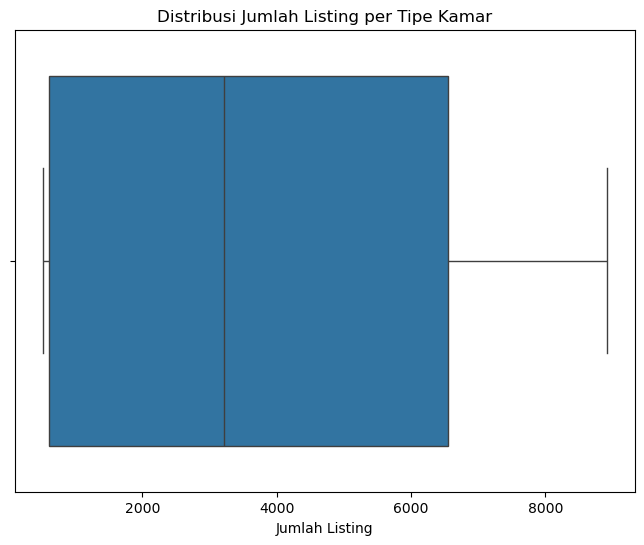

In [56]:
# Membuat boxplot untuk distribusi jumlah listing per tipe kamar
plt.figure(figsize=(8, 6))
sns.boxplot(x=room_type_distribution)
plt.title('Distribusi Jumlah Listing per Tipe Kamar')
plt.xlabel('Jumlah Listing')
plt.show()

**Visualisasi Boxplot**
- Kotak (Box): Bagian kotak dari boxplot mewakili interquartile range (IQR), yang mencakup 50% dari data Anda. Ini adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3).

    - Bagian bawah kotak menunjukkan kuartil pertama (Q1), yang merupakan 25% dari data terendah.
    - Bagian atas kotak menunjukkan kuartil ketiga (Q3), yang merupakan 25% dari data tertinggi.
    - Garis tengah di dalam kotak adalah median (Q2), yaitu nilai tengah dari data yang diurutkan.

- Garis Whiskers: Garis horizontal di kedua sisi kotak menunjukkan rentang data yang dianggap normal. Whiskers biasanya ditarik sampai ke data paling jauh yang tidak dianggap sebagai outliers, yaitu data yang masih dalam jangkauan 1.5 kali IQR dari Q1 dan Q3.

    - Batas bawah whisker: Menunjukkan nilai minimum yang masih dianggap normal.
    - Batas atas whisker: Menunjukkan nilai maksimum yang masih dianggap normal.

**Distribusi Tipe Kamar:**

- Median: Median dari jumlah listing di setiap tipe kamar terlihat berada sekitar 4000-an.
- IQR: Rentang IQR terlihat cukup luas, menunjukkan bahwa ada variasi yang signifikan dalam jumlah listing di setiap tipe kamar.

**Whiskers:**
- Batas Bawah: Tidak ada tanda yang menunjukkan nilai yang sangat rendah. Whisker bawah menunjukkan bahwa nilai paling rendah dari distribusi jumlah listing masih dalam kisaran normal.
- Batas Atas: Whisker atas menunjukkan bahwa distribusi jumlah listing masih mencapai angka lebih dari 8000. Tidak ada outliers yang mencolok ke arah jumlah listing yang lebih tinggi.

**Tidak Ada Outliers yang Jelas: Dari boxplot ini, tidak terlihat adanya titik yang berada di luar whiskers (baik di atas maupun di bawah), yang berarti tidak ada outliers yang terdeteksi dalam distribusi jumlah listing per tipe kamar.**

In [57]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = room_type_distribution.quantile(0.25)
Q3 = room_type_distribution.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan tipe kamar yang dianggap outliers
outliers = room_type_distribution[(room_type_distribution < lower_bound) | (room_type_distribution > upper_bound)]

# Menampilkan tipe kamar yang dianggap outliers
outliers


Series([], Name: count, dtype: int64)

### Kesimpulan

**Dari hasil pengecekan secara IQR  dan boxplot tidak ditemukannya ourliers**

## price

In [58]:
# Melihat statistik deskriptif dari kolom 'price'
pd.DataFrame(data_bersih['price'].describe())

,price
count,1.585400e+04
mean,3.217704e+03
std,2.497212e+04
min,0.000000e+00
25%,9.000000e+02
50%,1.429000e+03
75%,2.429000e+03
max,1.100000e+06


In [59]:
# Memfilter baris dengan nilai 'price' sama dengan 0
data_bersih[data_bersih['price'] == 0]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11103,Vadhana,Hotel room,0,1,0,NaN,1,0


In [60]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = data_bersih.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 15854
Jumlah kolom: 8


Ditemukannya listing atau baris yang memiliki price = 0 sementara memiliki minimum_night 1 hari, ini dapat diasumsikan bahwa kemungkinan besar admin salah melakukan input data, tidak mungkin ada hotel yang disewakan secara gratis dengan minimal menginap 1 malam. Sehingga untuk baris ini dapat dihapus

In [61]:
# Menghapus baris yang memiliki harga 0
data_bersih = data_bersih[data_bersih['price'] != 0]

In [62]:
# melakukan verifikasi baris dengan nilai 'price' sama dengan 0
data_bersih[data_bersih['price'] == 0]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [63]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = data_bersih.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 15853
Jumlah kolom: 8


data telah terhapus dengan ditunjukannya perbedaan jumlah baris antara sebelum dan sesudah menghapus price = 0

In [64]:
data_bersih.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.585300e+04,15853.000000,15853.000000,10064.000000,15853.000000,15853.000000
mean,3.217907e+03,15.293257,16.655207,0.813145,13.890431,244.394058
std,2.497290e+04,50.816496,40.614397,1.090196,30.270630,125.832224
min,2.780000e+02,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000
50%,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000
75%,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000


### Missing Value

In [65]:
# Mengecek missing values dalam kolom 'price'
data_bersih['price'].isnull().sum()

0

telah dilakukan pengecekan terhadap kolom price untuk NaN tidak ditemukan, selanjutnya bisa melakukan pengecekan outliers

### Outliers

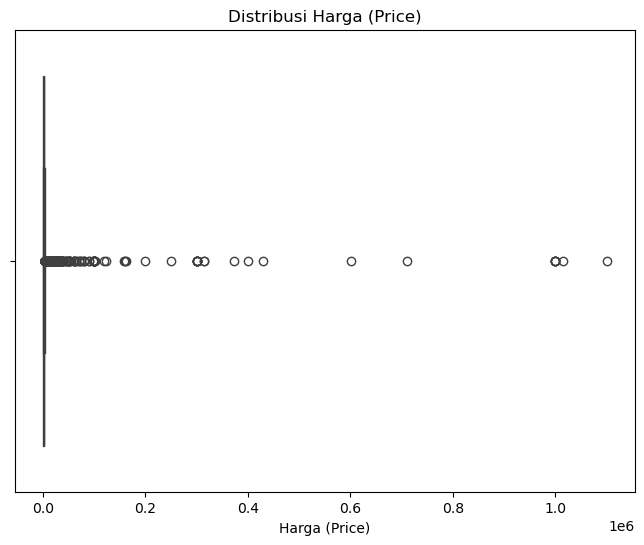

In [66]:
# Membuat boxplot untuk kolom 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_bersih['price'])
plt.title('Distribusi Harga (Price)')
plt.xlabel('Harga (Price)')
plt.show()

**Outliers**

- Titik-Titik di Luar Whiskers: Titik-titik yang berada jauh di luar whiskers adalah outliers. Ini adalah nilai harga yang dianggap sangat berbeda dari data lainnya.

     - Outliers di Sebelah Kanan: Outliers di sebelah kanan whiskers menunjukkan listing dengan harga yang sangat tinggi, mungkin lebih dari 1 juta (1e6) dalam mata uang lokal. Ini bisa mencakup listing mewah atau kesalahan input data.
     
     - Sebaran Outliers: Sebaran outliers menunjukkan bahwa ada beberapa listing dengan harga yang jauh di atas batas normal, yang bisa mengindikasikan bahwa sebagian kecil dari listing memiliki harga yang sangat ekstrem.

- Distribusi Harga yang Tidak Merata: Dari boxplot, terlihat bahwa sebagian besar harga listing terkonsentrasi di dekat median, sementara beberapa harga sangat jauh dari nilai rata-rata, menunjukkan adanya beberapa listing dengan harga yang sangat tinggi.

- Banyaknya Outliers: Adanya banyak outliers di sisi kanan menunjukkan bahwa data harga ini memiliki ekor kanan yang panjang (right-skewed), artinya ada beberapa listing yang sangat mahal dibandingkan dengan kebanyakan listing lainnya.

In [67]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = data_bersih['price'].quantile(0.25)
Q3 = data_bersih['price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan data yang dianggap outliers
outliers = data_bersih[(data_bersih['price'] < lower_bound) | (data_bersih['price'] > upper_bound)]

# Menampilkan outliers
print(outliers[['price']])


        price
17     122594
18       5680
19       5034
34       5429
48       8658
...       ...
15756   17900
15757   17900
15765    7589
15766    7589
15767    8900

[1403 rows x 1 columns]


In [68]:
print('nilai lower_bound',lower_bound)

print('\n\nnilai upper_bound',upper_bound)

nilai lower_bound -1393.5


nilai upper_bound 4722.5


benyak sekali ditemukan outliers pada kolom price dengan nilai lower_bound -1393.5 dan nilai upper_bound 4722.5

**Investigasi Outliers**:

Listing dengan harga yang sangat tinggi mungkin perlu diinvestigasi lebih lanjut untuk memastikan apakah mereka valid atau hasil dari kesalahan input data.

In [69]:
#Mencaritahu unutuk baris data yang dibawah lower_bound
data_bersih[(data_bersih['price'] < lower_bound)]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [70]:
#Mencaritahu unutuk baris data yang diatas upper_bound
price_upper_bound = data_bersih[(data_bersih['price'] > upper_bound)]
price_upper_bound

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17,Chatu Chak,Entire home/apt,122594,2,9,0.09,6,180
18,Khlong Toei,Entire home/apt,5680,28,148,1.08,1,334
19,Vadhana,Entire home/apt,5034,21,287,2.59,1,349
34,Sathon,Entire home/apt,5429,2,3,0.03,3,174
48,Nong Chok,Entire home/apt,8658,1,0,NaN,1,363
...,...,...,...,...,...,...,...,...
15756,Lat Phrao,Entire home/apt,17900,2,0,NaN,10,362
15757,Chatu Chak,Private room,17900,2,0,NaN,10,362
15765,Vadhana,Entire home/apt,7589,1,0,NaN,44,364
15766,Vadhana,Entire home/apt,7589,1,0,NaN,44,364


In [71]:
price_upper_bound.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.403000e+03,1403.000000,1403.000000,761.000000,1403.000000,1403.000000
mean,2.025496e+04,14.366358,12.165360,0.799803,12.284391,256.547398
std,8.199725e+04,65.471524,29.748969,1.051489,21.745013,128.895510
min,4.725000e+03,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.500000e+03,1.000000,0.000000,0.090000,1.000000,156.500000
50%,7.340000e+03,1.000000,1.000000,0.410000,5.000000,334.000000
75%,1.056450e+04,2.000000,9.000000,1.060000,14.000000,364.000000
max,1.100000e+06,999.000000,344.000000,8.140000,228.000000,365.000000


In [72]:
#Mencari harga tertinggi dengan detail data lainnya 
pd.DataFrame(price_upper_bound.max())

,0
neighbourhood,Yan na wa
room_type,Shared room
price,1100000
minimum_nights,999
number_of_reviews,344
reviews_per_month,8.14
calculated_host_listings_count,228
availability_365,365


In [73]:
#Mencari harga terendah dengan detail data lainnya
pd.DataFrame(price_upper_bound.min())

,0
neighbourhood,Bang Kapi
room_type,Entire home/apt
price,4725
minimum_nights,1
number_of_reviews,0
reviews_per_month,0.01
calculated_host_listings_count,1
availability_365,0


untuk outliers yang terdapat pada kolom price setelah melakukan pengecekan, tidak adanya kesalahan input ataupun sebagainya, hal itu mungkin saja terjadi adanya outliers mulai diatas 4725 hingga 1100000 dikarenakan bervariasinya jenis kamar, bervariasinya minimal malam yang harus dipesan, hal itu merupakan wajar, dan tidak ada penghapusan data pada outliers ini

### Kesimpulan

Meskipun banyak sekali outliers pada kolom price ini, ditemukan sebanyak 1403 data yang menjadi outliers, hal itu dapat diwajari karena setelah melakukan pengecekan bervariasinya harga, tipe ruangan serta minimal malam yang dipesan menjadikan faktor utamanya

## minimum_nights

In [74]:
# Melihat statistik deskriptif dari kolom 'minimum_nights'
pd.DataFrame(data_bersih['minimum_nights'].describe())

,minimum_nights
count,15853.000000
mean,15.293257
std,50.816496
min,1.000000
25%,1.000000
50%,1.000000
75%,7.000000
max,1125.000000


In [75]:
# Melihat nilai unik dalam kolom 'minimum_nights'
pd.DataFrame(data_bersih['minimum_nights'].unique())

,0
0,3
1,1
2,60
3,7
4,250
...,...
81,99
82,1095
83,39
84,190


### Mising Values

In [76]:
# Mengecek missing values dalam kolom 'minimum_nights'
data_bersih['minimum_nights'].isnull().sum()

0

### Outliers

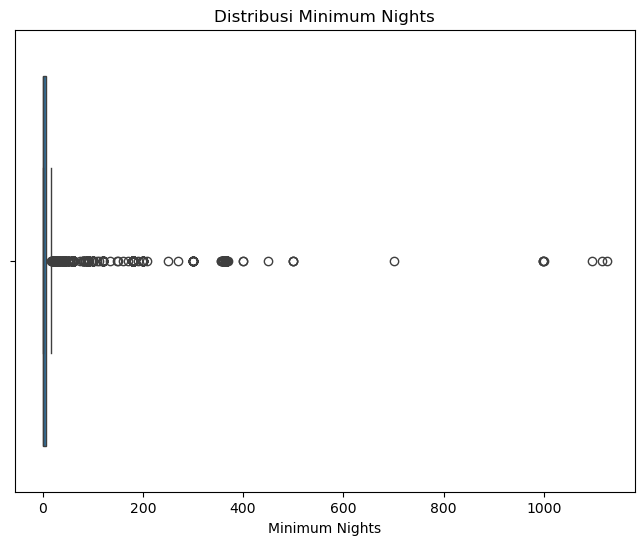

In [77]:
# Membuat boxplot untuk kolom 'minimum_nights'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_bersih['minimum_nights'])
plt.title('Distribusi Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

- Outliers di Sebelah Kanan: Titik-titik ini menunjukkan bahwa ada listing dengan nilai minimum_nights yang sangat tinggi, misalnya lebih dari 200 malam bahkan mencapai lebih dari 1000 malam.

- Sebaran Outliers: Sebaran outliers ini menunjukkan bahwa sebagian kecil dari listing memiliki persyaratan minimum yang sangat panjang, yang mungkin tidak masuk akal dalam konteks sewa jangka pendek.

- Distribusi yang Sangat Skewed: Distribusi minimum_nights sangat skewed (memiliki kemiringan ke kanan), dengan sebagian besar data terkonsentrasi di dekat bagian bawah whisker (dekat dengan nol atau beberapa malam) dan beberapa data jauh di luar batas atas whisker.

- Listing untuk sewa jangka panjang: Beberapa properti mungkin ditawarkan dengan persyaratan minimum yang sangat tinggi untuk menyaring penyewa jangka panjang.

In [78]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR untuk kolom 'minimum_nights'
Q1 = data_bersih['minimum_nights'].quantile(0.25)
Q3 = data_bersih['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan data yang dianggap outliers
outliers_minimum_nights = data_bersih[(data_bersih['minimum_nights'] < lower_bound) | (data_bersih['minimum_nights'] > upper_bound)]

# Menampilkan outliers
outliers_minimum_nights[['minimum_nights']]


,minimum_nights
2,60
5,250
14,30
16,30
18,28
...,...
15805,29
15833,30
15839,28
15840,28


In [79]:
#mengethui nilai lower_bound
lower_bound

-8.0

In [80]:
#mengethui nilai upper_bound
upper_bound

16.0

In [81]:
# Mencaritahu baris data mana saja yang memiliki nilai IQR dibawah lower bound
data_bersih[(data_bersih['minimum_nights'] < lower_bound)]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [82]:
# Mencaritahu baris data mana saja yang memiliki nilai IQR diatas upper bound
data_bersih[(data_bersih['minimum_nights'] > upper_bound)]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,Bang Kapi,Private room,800,60,0,NaN,1,365
5,Bang Kho laen,Entire home/apt,1000,250,19,0.17,41,365
14,Khlong Toei,Entire home/apt,1400,30,0,NaN,1,365
16,Khlong Toei,Entire home/apt,1577,30,78,0.78,1,330
18,Khlong Toei,Entire home/apt,5680,28,148,1.08,1,334
...,...,...,...,...,...,...,...,...
15805,Ratchathewi,Entire home/apt,2343,29,0,NaN,23,328
15833,Bang Rak,Private room,1900,30,0,NaN,45,363
15839,Huai Khwang,Entire home/apt,2100,28,0,NaN,2,332
15840,Bang Na,Entire home/apt,1400,28,0,NaN,2,364


### Kesimpulan

Setelah memahami data yang ada, kemudian mencari refrensi tentang bagaimana aturan menyekawan hunian dengan jangka waktu yang lama, pada kolom minimum_nights ini tidak menghapus outliers, sebab berdasarkan sumber refrensi [Airbnb](https://www.airbnb.co.id/help/article/2729?_set_bev_on_new_domain=1724343535_EAMTZkY2Y2ZTE2ZW) sangat memungkinkan sekali apabila adanya penyewaan Masa inap lebih dari 28 malam dan berdurasi lebih lama.

Refrensi Penguat Lainnya:
1. https://www.houst.com/blog/airbnb-long-term-rentals 
2. https://www.rentalrecon.com/airbnb-booking/can-you-rent-an-airbnb-for-a-year/ 

## number_of_reviews

In [83]:
# Melihat statistik deskriptif dari kolom 'number_of_reviews'
data_bersih['number_of_reviews'].describe()

count    15853.000000
mean        16.655207
std         40.614397
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

In [84]:
# Melihat nilai unik dalam kolom 'number_of_reviews'
pd.DataFrame(data_bersih['number_of_reviews'].unique())

,0
0,65
1,0
2,2
3,19
4,1
...,...
293,244
294,406
295,807
296,143


### Missing Value

In [85]:
# Mengecek missing values dalam kolom 'number_of_reviews'
data_bersih['number_of_reviews'].isnull().sum()

0

Tidak ditemukannya missing value pada kolom 'number_of_reviews' sehingga dapat melakukan pemrosesan untuk mencaritahu outliers yang ada pada kolom ini

### Outliers

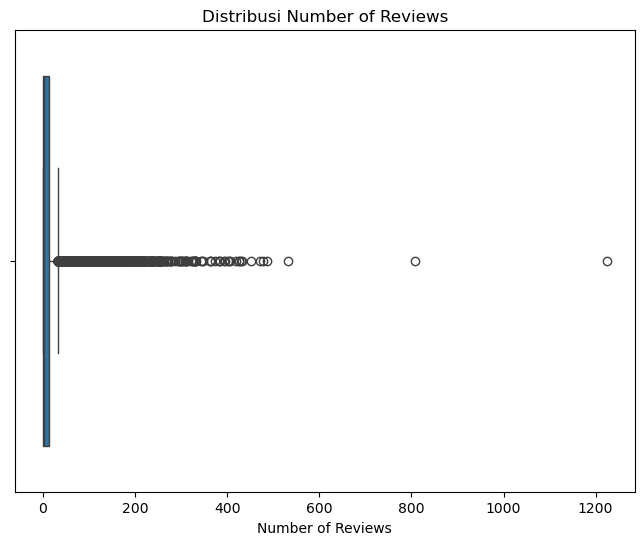

In [86]:
# Membuat boxplot untuk kolom 'number_of_reviews'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_bersih['number_of_reviews'])
plt.title('Distribusi Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

- Outliers di Sebelah Kanan: Titik-titik ini menunjukkan bahwa ada listing dengan jumlah review yang sangat tinggi, misalnya lebih dari 400 review bahkan mencapai lebih dari 1000 review.

- Sebaran Outliers: Sebaran outliers ini menunjukkan bahwa sebagian kecil dari listing memiliki jumlah review yang jauh lebih tinggi daripada mayoritas listing lainnya.

- Distribusi yang Sangat Skewed: Distribusi number_of_reviews sangat skewed (memiliki kemiringan ke kanan), dengan sebagian besar data terkonsentrasi di dekat bagian bawah whisker (dengan jumlah review yang rendah), dan beberapa data jauh di luar batas atas whisker dengan jumlah review yang sangat tinggi.

- Listing Populer: Beberapa properti mungkin sangat populer atau telah terdaftar di platform untuk waktu yang lama, sehingga mendapatkan banyak review.


In [87]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR untuk kolom 'number_of_reviews'
Q1 = data_bersih['number_of_reviews'].quantile(0.25)
Q3 = data_bersih['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan data yang dianggap outliers
outliers_number_of_reviews = data_bersih[(data_bersih['number_of_reviews'] < lower_bound) | (data_bersih['number_of_reviews'] > upper_bound)]

# Menampilkan outliers
pd.DataFrame(outliers_number_of_reviews[[ 'room_type','number_of_reviews', 'reviews_per_month', 'availability_365']])


,room_type,number_of_reviews,reviews_per_month,availability_365
0,Entire home/apt,65,0.50,353
11,Entire home/apt,129,1.17,356
12,Hotel room,208,1.44,361
16,Entire home/apt,78,0.78,330
18,Entire home/apt,148,1.08,334
...,...,...,...,...
13021,Entire home/apt,37,5.58,303
13168,Entire home/apt,33,4.67,278
13172,Entire home/apt,34,4.47,40
13177,Private room,101,17.41,304


In [88]:
data_bersih[data_bersih['number_of_reviews'] > 800]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3737,Phaya Thai,Entire home/apt,1571,3,1224,19.13,1,310
6586,Lat Krabang,Private room,1032,1,807,16.62,3,348


**Jumlah Review yang Sangat Tinggi**

- Informasi Utama: Beberapa listing memiliki jumlah review yang sangat tinggi, seperti yang terlihat pada baris terakhir (14153) dengan number_of_reviews sebesar 39, dan bahkan lebih tinggi pada beberapa baris lainnya seperti 13177 dengan 101 review, serta 13021 dengan 37 review.

- Interpretasi: Listing dengan jumlah review yang sangat tinggi menunjukkan bahwa listing tersebut sangat populer atau telah berada di platform untuk waktu yang lama.

**Konsistensi antara number_of_reviews dan reviews_per_month**

- Informasi Utama: reviews_per_month memberikan rata-rata review yang diterima oleh listing setiap bulannya. Dari data yang ditampilkan:

    - Listing dengan number_of_reviews = 101 memiliki reviews_per_month = 17.41.
    
    - Listing dengan number_of_reviews = 39 memiliki reviews_per_month = 12.72.

- Interpretasi: Nilai reviews_per_month yang tinggi mengindikasikan bahwa listing ini sangat aktif dan mungkin menerima banyak pemesanan. Konsistensi ini menunjukkan bahwa listing dengan review tinggi memang mendapatkan banyak ulasan setiap bulannya, yang dapat dianggap sebagai valid.

### Kesimpulan

**Pada proses pengecekan kolom number_of_reviews untuk outliers dapat dipertahankan, dikarenakan Nilai reviews_per_month yang tinggi mengindikasikan bahwa listing ini sangat aktif**

## review_per_month

In [89]:
# Melihat statistik deskriptif dari kolom 'reviews_per_month'
pd.DataFrame(data_bersih['reviews_per_month'].describe())

,reviews_per_month
count,10064.000000
mean,0.813145
std,1.090196
min,0.010000
25%,0.120000
50%,0.435000
75%,1.060000
max,19.130000


In [90]:
# Melihat nilai unik dalam kolom 'reviews_per_month'
pd.DataFrame(data_bersih['reviews_per_month'].unique())

,0
0,0.50
1,NaN
2,0.03
3,0.17
4,0.01
...,...
509,7.80
510,8.49
511,5.71
512,4.55


### Missing Value

In [91]:
# Mengecek missing values dalam kolom 'reviews_per_month'
data_bersih['reviews_per_month'].isnull().sum()

5789

pada kolom ini, melakukan pengubahan nilai NaN menggunakan domain knowlage '0'. Alasan mengisi nilai NaN dengan 0 dilakukan diasumsikan bahwa listing tersebut belum pernah direview atau diulas, sehingga ketika belum pernah dirivew atau diulas diberikan nilai '0' yang memiliki arti tersebut

In [92]:
# Mengganti nilai NaN yang ada pada list data menjadi angka '0'
data_bersih['reviews_per_month'].fillna(0, inplace=True)


/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/2650791458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_bersih['reviews_per_month'].fillna(0, inplace=True)
/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/2650791458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bersih['reviews_per_month'].f

In [93]:
#melakukan verifikasi nilai NaN pada kolom review_per_month sudah ter-replace atau belum
data_bersih['reviews_per_month'].isnull().sum()

0

In [94]:
# Memverifikasi missing values dalam kolom 'reviews_per_month'
data_bersih['reviews_per_month'].isnull().sum()

0

Telah dilakukan pengecekan, dan data NaN pada reviews_per_month menjadi '0'

### Outliers

Selanjutnya pada tahap ini, melakukan pengecekan terhadap outliers kolom review_per_month

In [95]:
data_bersih.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.585300e+04,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000
mean,3.217907e+03,15.293257,16.655207,0.516211,13.890431,244.394058
std,2.497290e+04,50.816496,40.614397,0.952774,30.270630,125.832224
min,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000
50%,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000
75%,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000


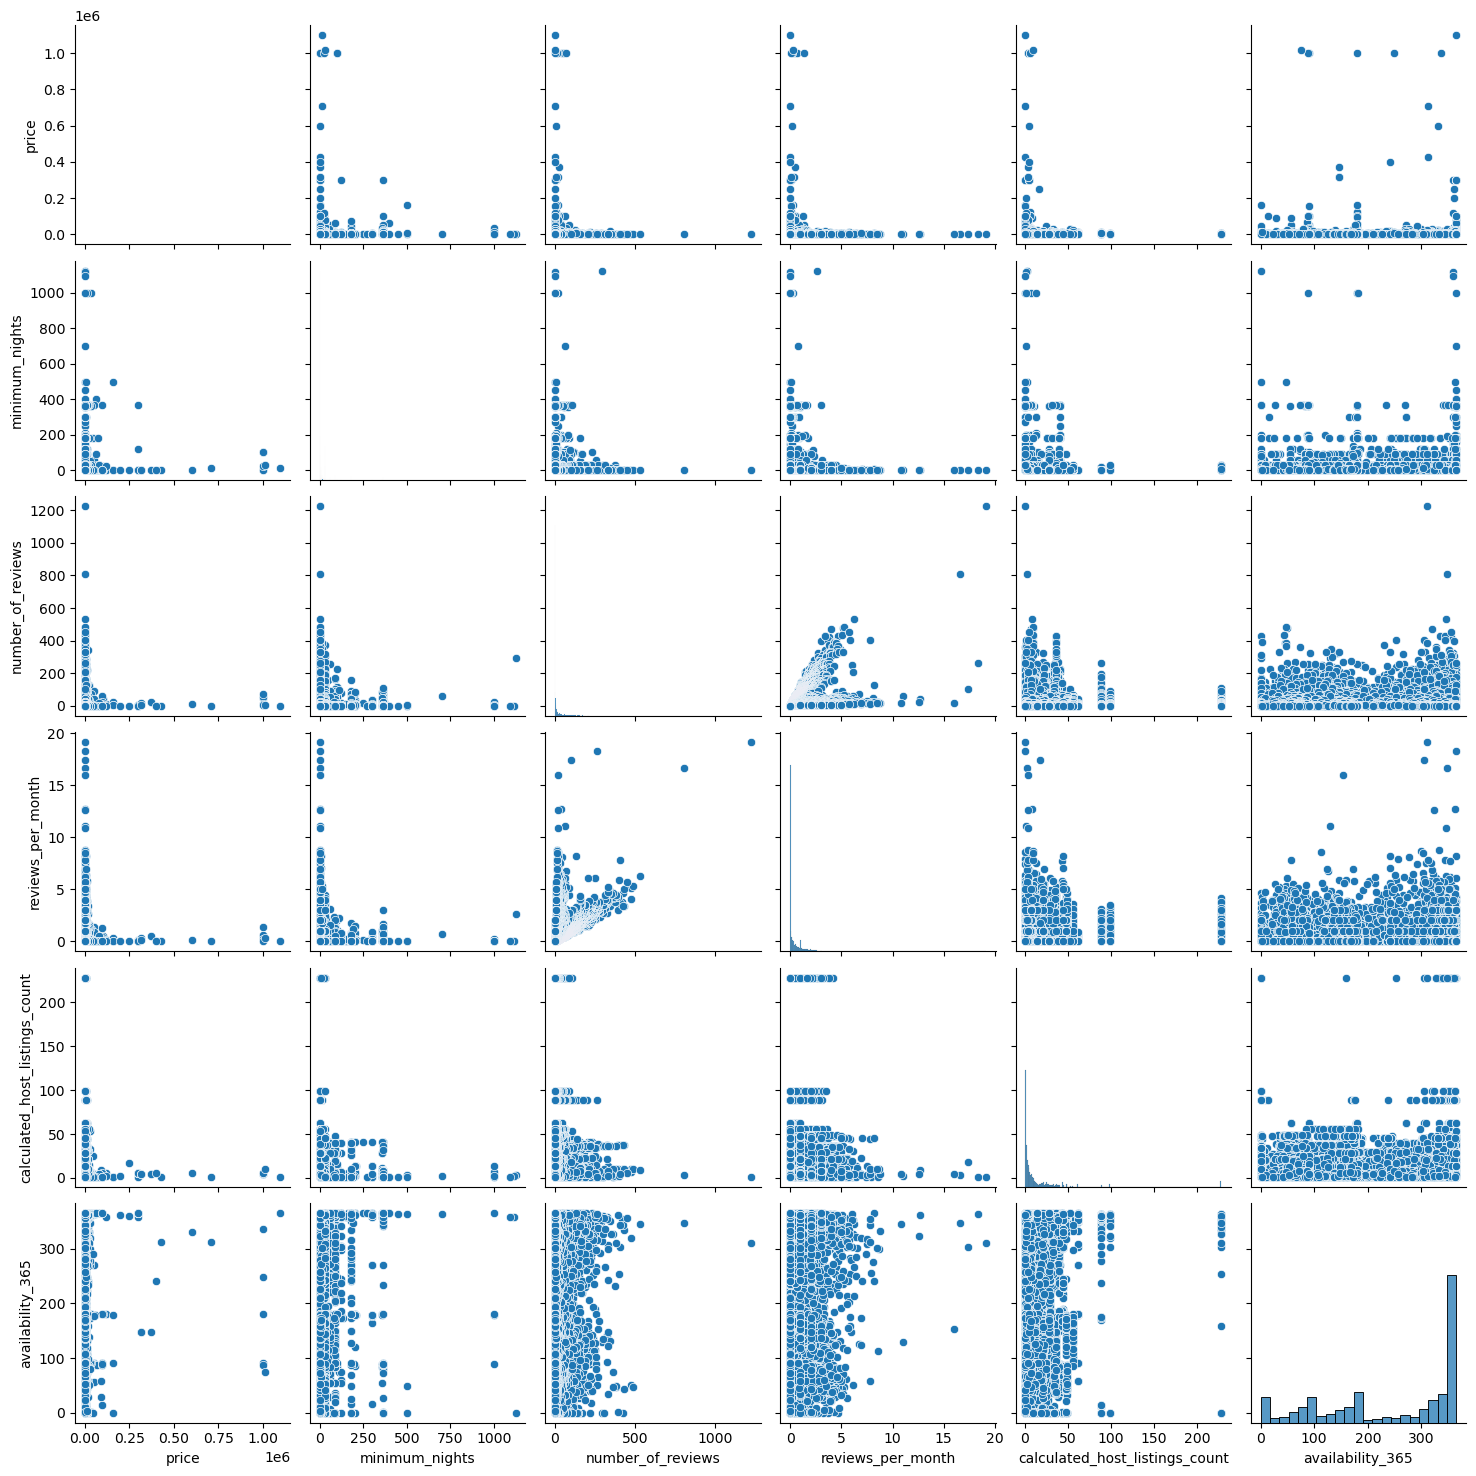

In [96]:
sns.pairplot(data_bersih)

<Axes: ylabel='reviews_per_month'>

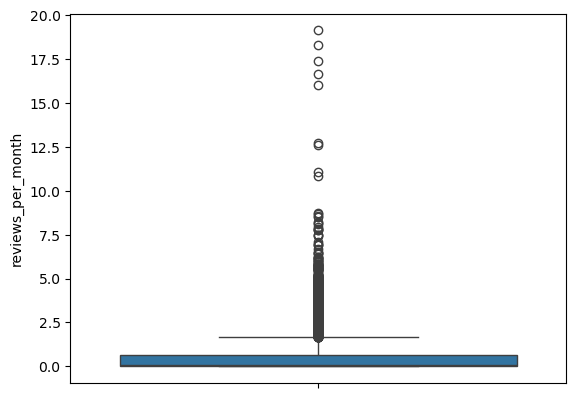

In [97]:
sns.boxplot(data_bersih['reviews_per_month'])


- Outliers di Sebelah Atas: Beberapa listing memiliki reviews_per_month yang mencapai 10, 15, bahkan hingga hampir 20 ulasan per bulan. Ini jauh di atas batas atas whisker dan dianggap sebagai outliers.

- Distribusi Skewed: Distribusi data reviews_per_month sangat skewed ke kanan, artinya mayoritas listing memiliki rata-rata ulasan per bulan yang relatif rendah, tetapi ada beberapa listing dengan nilai yang jauh lebih tinggi.

- Outliers yang Signifikan: Kehadiran outliers ini menunjukkan bahwa ada listing tertentu yang sangat populer dan mendapatkan ulasan yang jauh lebih banyak dibandingkan listing lainnya.

- Listing Sangat Populer: Outliers yang terlihat dalam boxplot mungkin mencerminkan listing yang sangat populer atau memiliki daya tarik unik, sehingga menarik banyak ulasan dalam waktu singkat.

In [98]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR untuk kolom 'reviews_per_month'
Q1 = data_bersih['reviews_per_month'].quantile(0.25)
Q3 = data_bersih['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan data yang dianggap outliers
outliers_reviews_per_month = data_bersih[(data_bersih['reviews_per_month'] < lower_bound) | (data_bersih['reviews_per_month'] > upper_bound)]

# Menampilkan outliers
pd.DataFrame(outliers_reviews_per_month[['reviews_per_month', 'number_of_reviews', 'availability_365']])


,reviews_per_month,number_of_reviews,availability_365
19,2.59,287,349
41,3.77,419,355
46,2.59,268,350
47,3.00,310,331
53,4.02,472,320
...,...,...,...
15633,5.00,5,352
15639,2.00,2,343
15743,3.00,3,349
15744,3.00,3,365


## calculated_host_listings_count

In [99]:
# Melihat statistik deskriptif dari kolom 'calculated_host_listings_count'
pd.DataFrame(data_bersih['calculated_host_listings_count'].describe())


,calculated_host_listings_count
count,15853.000000
mean,13.890431
std,30.270630
min,1.000000
25%,1.000000
50%,4.000000
75%,13.000000
max,228.000000


In [100]:
# Melihat nilai unik dalam kolom 'calculated_host_listings_count'
pd.DataFrame(data_bersih['calculated_host_listings_count'].unique())

,0
0,2
1,1
2,3
3,41
4,10
5,7
6,6
7,4
8,37
9,8


### Mising Values

In [101]:
data_bersih['calculated_host_listings_count'].isnull().sum()

0

### Outliers

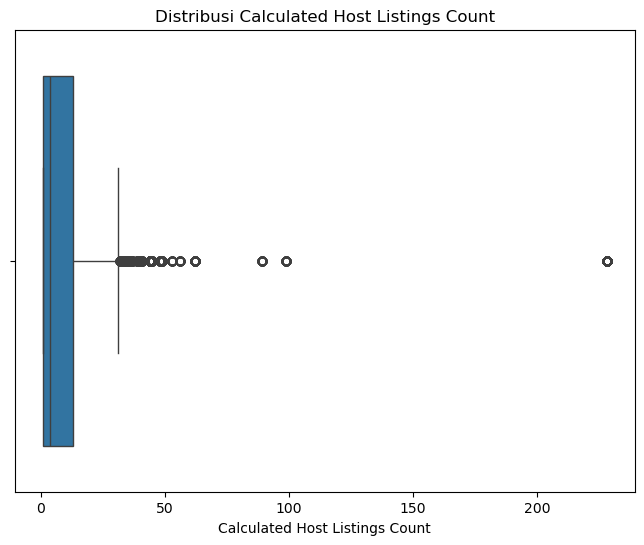

In [102]:
# Membuat boxplot untuk kolom 'calculated_host_listings_count'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_bersih['calculated_host_listings_count'])
plt.title('Distribusi Calculated Host Listings Count')
plt.xlabel('Calculated Host Listings Count')
plt.show()

In [103]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR untuk kolom 'calculated_host_listings_count'
Q1 = data_bersih['calculated_host_listings_count'].quantile(0.25)
Q3 = data_bersih['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan data yang dianggap outliers
outliers_calculated_host_listings_count = data_bersih[(data_bersih['calculated_host_listings_count'] < lower_bound) | (data_bersih['calculated_host_listings_count'] > upper_bound)]

# Menampilkan outliers
pd.DataFrame(outliers_calculated_host_listings_count[['calculated_host_listings_count']])


,calculated_host_listings_count
5,41
41,37
73,37
80,37
89,37
...,...
15783,228
15786,45
15802,39
15808,53


# Data Bersih

In [104]:
data_bersih

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Ratchathewi,Entire home/apt,1905,3,65,0.50,2,353
1,Bang Na,Private room,1316,1,0,0.00,2,358
2,Bang Kapi,Private room,800,60,0,0.00,1,365
3,Din Daeng,Private room,1286,7,2,0.03,1,323
4,Bang Kapi,Private room,1905,1,0,0.00,3,365
...,...,...,...,...,...,...,...,...
15849,Pra Wet,Private room,2298,28,0,0.00,1,362
15850,Ratchathewi,Private room,1429,1,0,0.00,14,365
15851,Ratchathewi,Private room,1214,1,0,0.00,14,365
15852,Ratchathewi,Private room,1214,1,0,0.00,14,365


# Analisis Data

## Mengelompokkan

In [105]:
# Menghitung jumlah tipe kamar di setiap neighborhood
room_distribution = data_bersih.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Menambahkan kolom total yang menghitung semua tipe kamar di setiap neighborhood
# room_distribution.sum(axis=1)

# Menampilkan hasil distribusi tipe kamar di berbagai wilayah
room_distribution


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Bon,2,0,3,0
Bang Kapi,124,1,132,3
Bang Khae,35,1,56,0
Bang Khen,48,3,64,1
Bang Kho laen,93,2,45,0
Bang Khun thain,7,0,12,2
Bang Na,278,9,168,3
Bang Phlat,132,3,76,6
Bang Rak,351,67,375,34


In [106]:
# Menghitung jumlah tipe kamar di setiap neighborhood
test = data_bersih.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Menambahkan kolom total yang menghitung semua tipe kamar di setiap neighborhood
test['Total'] = room_distribution.sum(axis=1)

# Menampilkan hasil total tipe kamar di berbagai wilayah
test


room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Bang Bon,2,0,3,0,5
Bang Kapi,124,1,132,3,260
Bang Khae,35,1,56,0,92
Bang Khen,48,3,64,1,116
Bang Kho laen,93,2,45,0,140
Bang Khun thain,7,0,12,2,21
Bang Na,278,9,168,3,458
Bang Phlat,132,3,76,6,217
Bang Rak,351,67,375,34,827


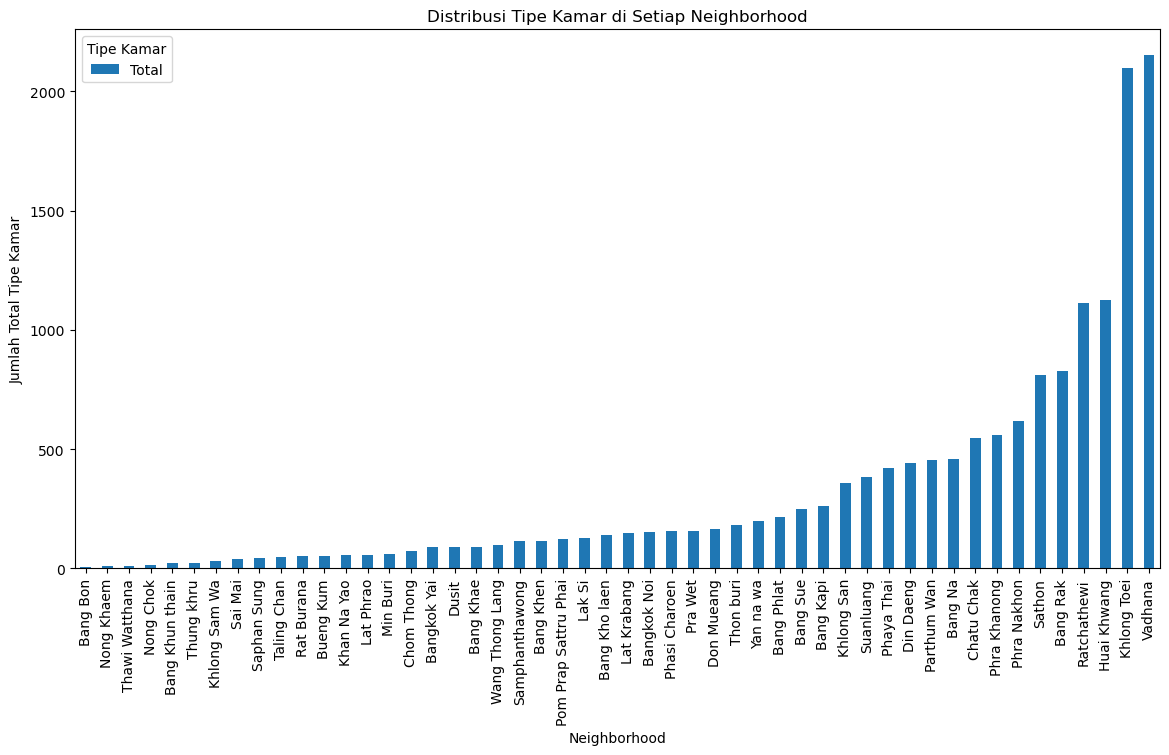

In [107]:
# Visualisasi jumlah tipe kamar dengan bar plot
test['Total'].sort_values().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribusi Tipe Kamar di Setiap Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Total Tipe Kamar')
plt.xticks(rotation=90)
plt.legend(title='Tipe Kamar')
plt.show()


## Memvisualkan Pengelompokan Bedasarkan Tipe Kamar

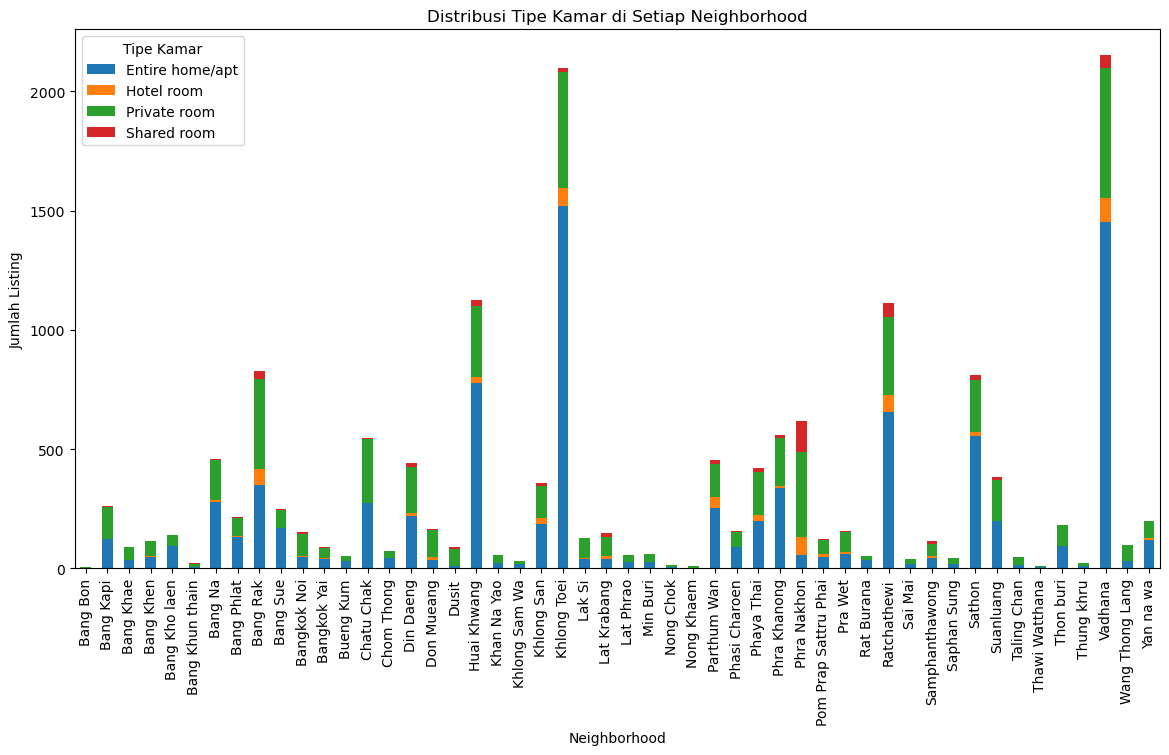

In [108]:
# Visualisasi distribusi tipe kamar dengan bar plot
room_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribusi Tipe Kamar di Setiap Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=90)
plt.legend(title='Tipe Kamar')
plt.show()


## Mencari kamar paling populer

In [109]:
data_bersih.groupby('room_type').size().reset_index(name='count')

,room_type,count
0,Entire home/apt,8912
1,Hotel room,648
2,Private room,5770
3,Shared room,523


In [110]:
# Menemukan tipe kamar paling populer di setiap neighborhood
popular_room_type = room_distribution.idxmax(axis=1)
popular_room_type.name = 'most_popular_room_type'
pd.DataFrame(popular_room_type)

,most_popular_room_type
neighbourhood,
Bang Bon,Private room
Bang Kapi,Private room
Bang Khae,Private room
Bang Khen,Private room
Bang Kho laen,Entire home/apt
Bang Khun thain,Private room
Bang Na,Entire home/apt
Bang Phlat,Entire home/apt
Bang Rak,Private room


In [111]:
# Menghitung jumlah setiap tipe kamar yang menjadi paling populer
popular_room_type_count = popular_room_type.value_counts()

# Menampilkan hasilnya
print(popular_room_type_count)

most_popular_room_type
Private room       26
Entire home/apt    24
Name: count, dtype: int64


/var/folders/2b/c01cljzd7vd6mn9hmvwjdp580000gn/T/ipykernel_7491/1821550448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_room_type_count.index, y=popular_room_type_count.values, palette='viridis')


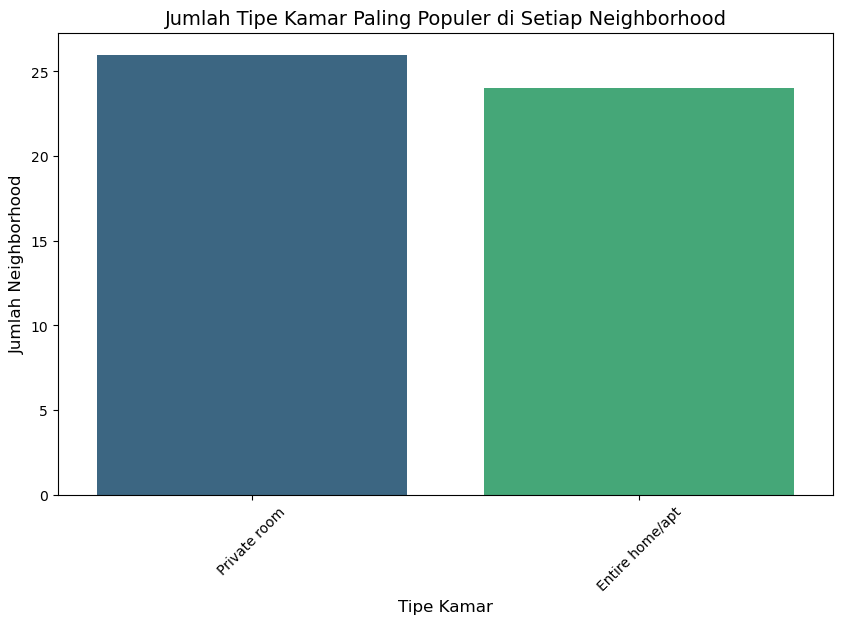

In [112]:
# Membuat barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_room_type_count.index, y=popular_room_type_count.values, palette='viridis')

# Menambahkan judul dan label
plt.title('Jumlah Tipe Kamar Paling Populer di Setiap Neighborhood', fontsize=14)
plt.xlabel('Tipe Kamar', fontsize=12)
plt.ylabel('Jumlah Neighborhood', fontsize=12)
plt.xticks(rotation=45)
plt.show()

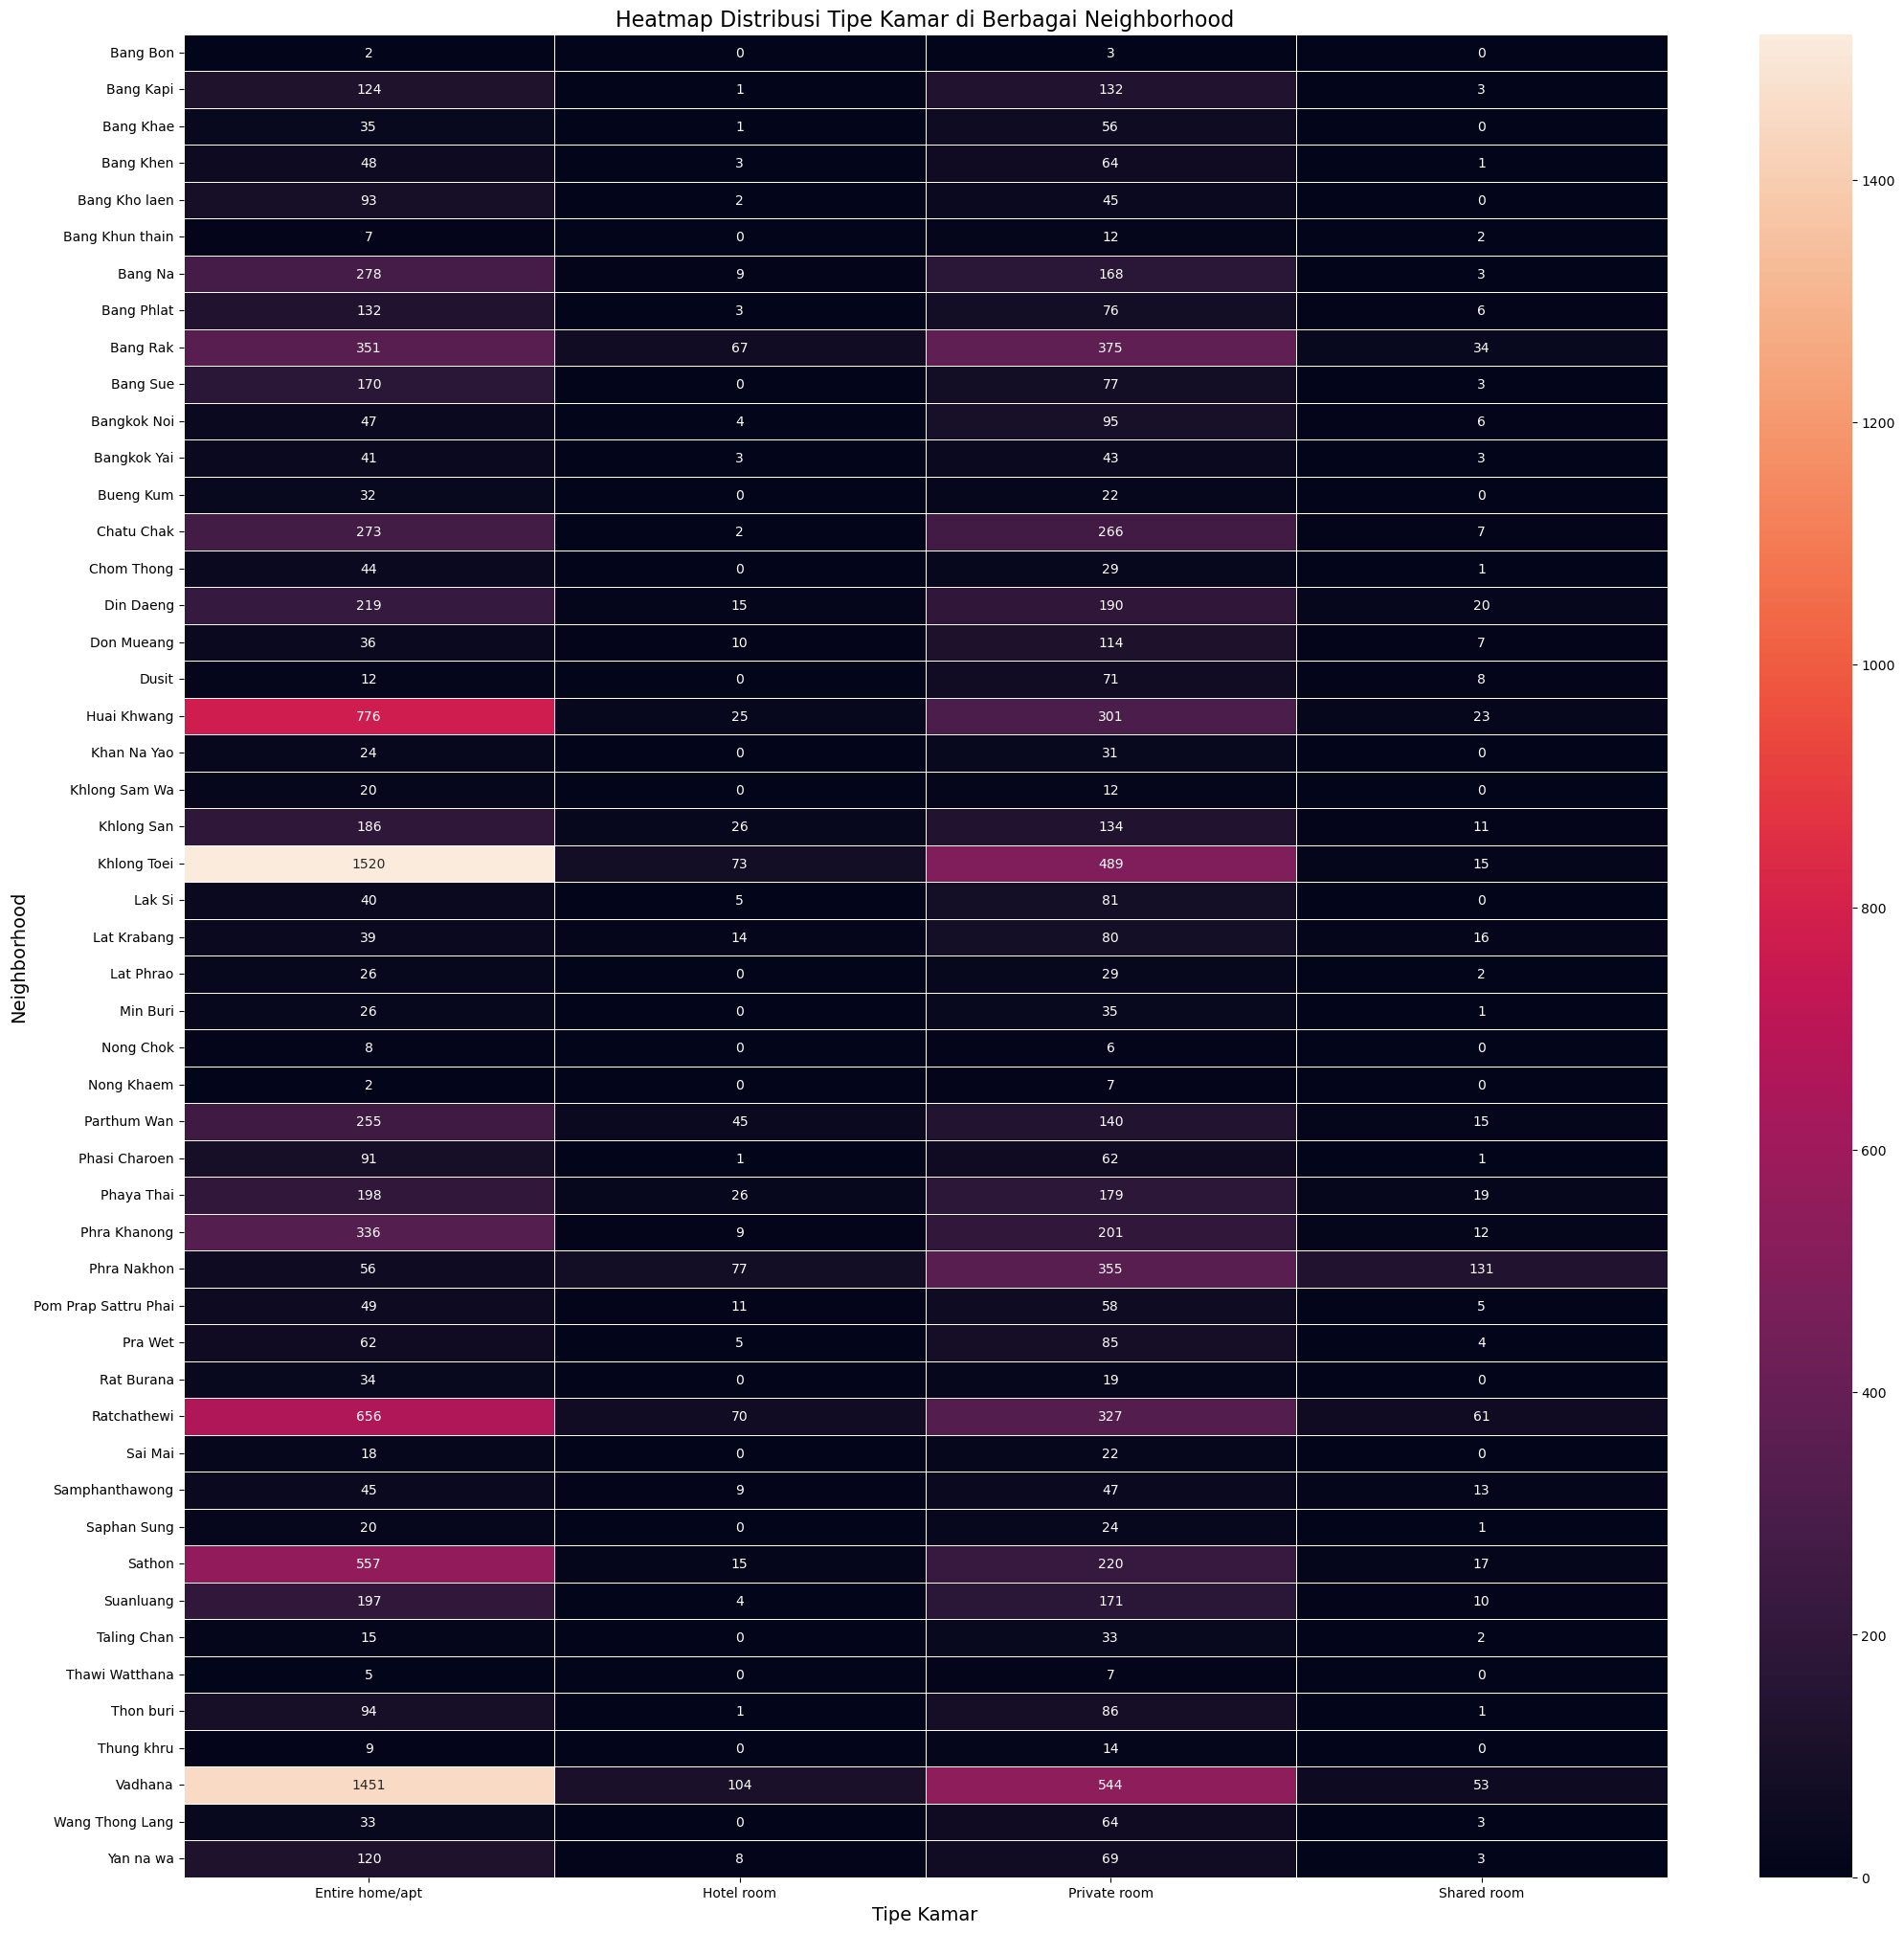

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat heatmap untuk menampilkan distribusi semua tipe kamar di berbagai neighborhood
plt.figure(figsize=(25, 25))
sns.heatmap(room_distribution, annot=True, fmt="d", linewidths=.5)

# Menambahkan judul dan label
plt.title('Heatmap Distribusi Tipe Kamar di Berbagai Neighborhood', fontsize=16)
plt.xlabel('Tipe Kamar', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.show()


## Harga Rata-Rata Setiap Kamar di daerah

In [114]:
# Menghitung harga rata-rata per tipe kamar di setiap neighborhood
average_price_by_room_type = data_bersih.groupby(['neighbourhood', 'room_type'])['price'].mean().unstack()
pd.DataFrame(average_price_by_room_type)


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Bon,1600.000000,NaN,1440.666667,NaN
Bang Kapi,1586.911290,600.000000,4558.227273,755.333333
Bang Khae,1714.600000,750.000000,1953.839286,NaN
Bang Khen,1331.250000,1386.000000,2905.875000,550.000000
Bang Kho laen,1646.000000,7765.000000,3745.066667,NaN
Bang Khun thain,6210.714286,NaN,1122.666667,7276.000000
Bang Na,1785.895683,2738.111111,2498.815476,852.333333
Bang Phlat,1780.886364,2098.333333,14616.894737,936.500000
Bang Rak,3869.917379,2065.358209,2697.565333,567.147059


In [115]:
# Mengganti semua nilai NaN dengan 0
average_price_by_room_type_filled = average_price_by_room_type.fillna(0)
pd.DataFrame(average_price_by_room_type_filled)


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Bon,1600.000000,0.000000,1440.666667,0.000000
Bang Kapi,1586.911290,600.000000,4558.227273,755.333333
Bang Khae,1714.600000,750.000000,1953.839286,0.000000
Bang Khen,1331.250000,1386.000000,2905.875000,550.000000
Bang Kho laen,1646.000000,7765.000000,3745.066667,0.000000
Bang Khun thain,6210.714286,0.000000,1122.666667,7276.000000
Bang Na,1785.895683,2738.111111,2498.815476,852.333333
Bang Phlat,1780.886364,2098.333333,14616.894737,936.500000
Bang Rak,3869.917379,2065.358209,2697.565333,567.147059


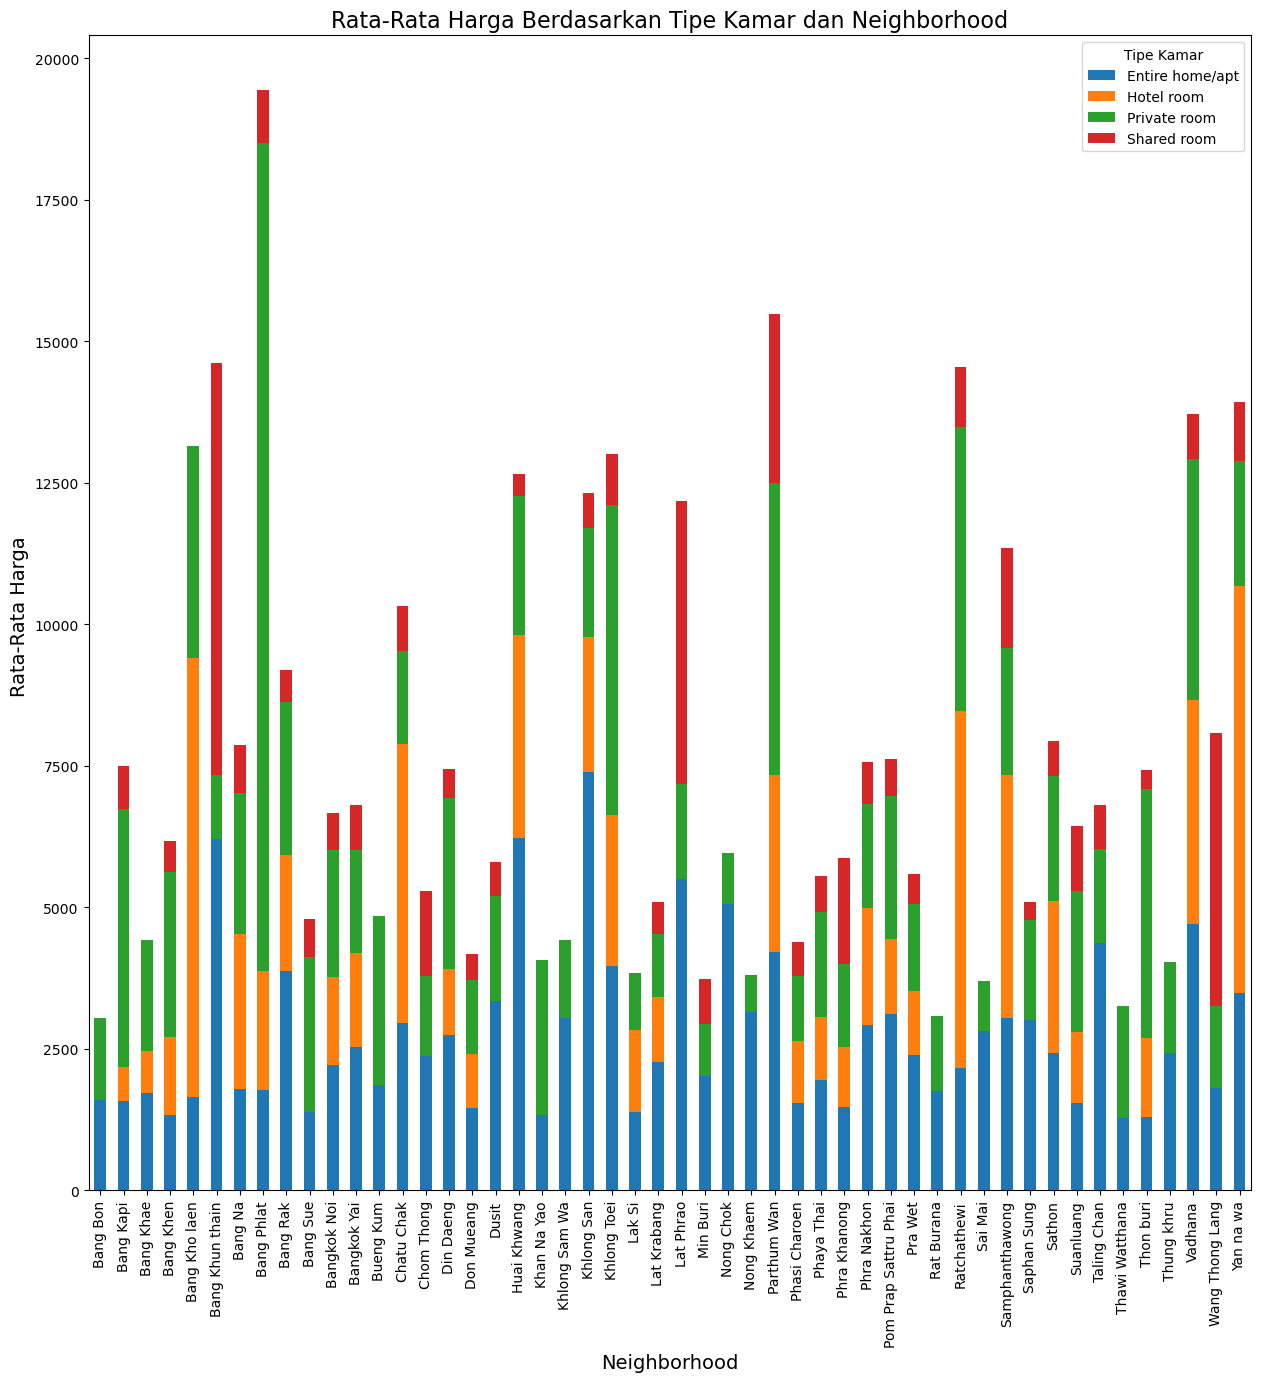

In [116]:
average_price_by_room_type_filled.plot(kind='bar', figsize=(15, 15), stacked=True)

plt.title('Rata-Rata Harga Berdasarkan Tipe Kamar dan Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Rata-Rata Harga ', fontsize=14)
plt.legend(title='Tipe Kamar')
plt.show()


In [117]:
# Mencari rata-rata harga tertinggi untuk setiap tipe kamar
highest_avg_price = average_price_by_room_type_filled.max()

# Mencari neighborhood yang memiliki rata-rata harga tertinggi untuk setiap tipe kamar
neighborhood_with_highest_avg_price = average_price_by_room_type_filled.idxmax()

# Menggabungkan hasilnya menjadi DataFrame untuk interpretasi yang lebih mudah
result = pd.DataFrame({
    'Highest Avg Price': highest_avg_price,
    'Neighborhood': neighborhood_with_highest_avg_price
})

# Menampilkan hasil
pd.DataFrame(result)


,Highest Avg Price,Neighborhood
room_type,,
Entire home/apt,7395.768817,Khlong San
Hotel room,7765.000000,Bang Kho laen
Private room,14616.894737,Bang Phlat
Shared room,7276.000000,Bang Khun thain


In [118]:
# Menggabungkan data harga rata-rata dengan data popularitas
data_bersih = data_bersih.join(average_price_by_room_type, on='neighbourhood', rsuffix='_average')


In [119]:
# Melakukan analisis korelasi antara harga dan popularitas tipe kamar
price_correlation = data_bersih[['price', 'calculated_host_listings_count']].corr()
pd.DataFrame(price_correlation)

,price,calculated_host_listings_count
price,1.000000,-0.013303
calculated_host_listings_count,-0.013303,1.000000


In [120]:
# Membuat salinan data untuk analisis
#data_encoded = data_bersih.copy()

# Mengonversi 'room_type' menjadi variabel dummy
#room_type_dummies = pd.get_dummies(data_encoded['room_type'], prefix='room_type')

# Mengonversi 'neighbourhood' menjadi variabel dummy
#neighbourhood_dummies = pd.get_dummies(data_encoded['neighbourhood'], prefix='neighbourhood')

# Menggabungkan dummy variables ke dataset
#data_encoded = pd.concat([data_encoded, room_type_dummies, neighbourhood_dummies], axis=1)

# Menampilkan beberapa baris untuk verifikasi
#pd.DataFrame(data_encoded)


## Menghitung tipe kamar setiap neighbourhood

In [121]:
# Menghitung jumlah listing per 'neighbourhood' dan 'room_type'
room_popularity = data_bersih.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

# Menampilkan beberapa baris untuk verifikasi
print(room_popularity)


       neighbourhood        room_type  count
0           Bang Bon  Entire home/apt      2
1           Bang Bon     Private room      3
2          Bang Kapi  Entire home/apt    124
3          Bang Kapi       Hotel room      1
4          Bang Kapi     Private room    132
..               ...              ...    ...
163  Wang Thong Lang      Shared room      3
164        Yan na wa  Entire home/apt    120
165        Yan na wa       Hotel room      8
166        Yan na wa     Private room     69
167        Yan na wa      Shared room      3

[168 rows x 3 columns]


## Mencari Korelasi

In [122]:
# Memilih kolom-kolom numerik untuk korelasi
numerical_cols = data_bersih.select_dtypes(include=['int64', 'float64']).columns

# Menghitung matriks korelasi
correlation_matrix = data_bersih[numerical_cols].corr()

# Menampilkan matriks korelasi
pd.DataFrame(correlation_matrix)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room
price,1.000000,0.020153,-0.004371,-0.011567,-0.013303,0.000773,0.038716,0.016066,0.031978,-0.002608
minimum_nights,0.020153,1.000000,-0.034219,-0.080454,-0.053604,0.053146,0.003654,0.027884,0.017088,0.021258
number_of_reviews,-0.004371,-0.034219,1.000000,0.571886,0.036328,-0.077288,0.031457,0.015496,0.004429,-0.035171
reviews_per_month,-0.011567,-0.080454,0.571886,1.000000,0.114960,-0.074253,0.071894,0.022390,0.085331,-0.035781
calculated_host_listings_count,-0.013303,-0.053604,0.036328,0.114960,1.000000,0.008491,0.079512,0.103451,0.084605,-0.041419
availability_365,0.000773,0.053146,-0.077288,-0.074253,0.008491,1.000000,-0.096025,-0.024890,-0.041710,0.016069
Entire home/apt,0.038716,0.003654,0.031457,0.071894,0.079512,-0.096025,1.000000,0.222177,0.075874,-0.095441
Hotel room,0.016066,0.027884,0.015496,0.022390,0.103451,-0.024890,0.222177,1.000000,0.218821,0.081425
Private room,0.031978,0.017088,0.004429,0.085331,0.084605,-0.041710,0.075874,0.218821,1.000000,0.058412
Shared room,-0.002608,0.021258,-0.035171,-0.035781,-0.041419,0.016069,-0.095441,0.081425,0.058412,1.000000


### Heatmap

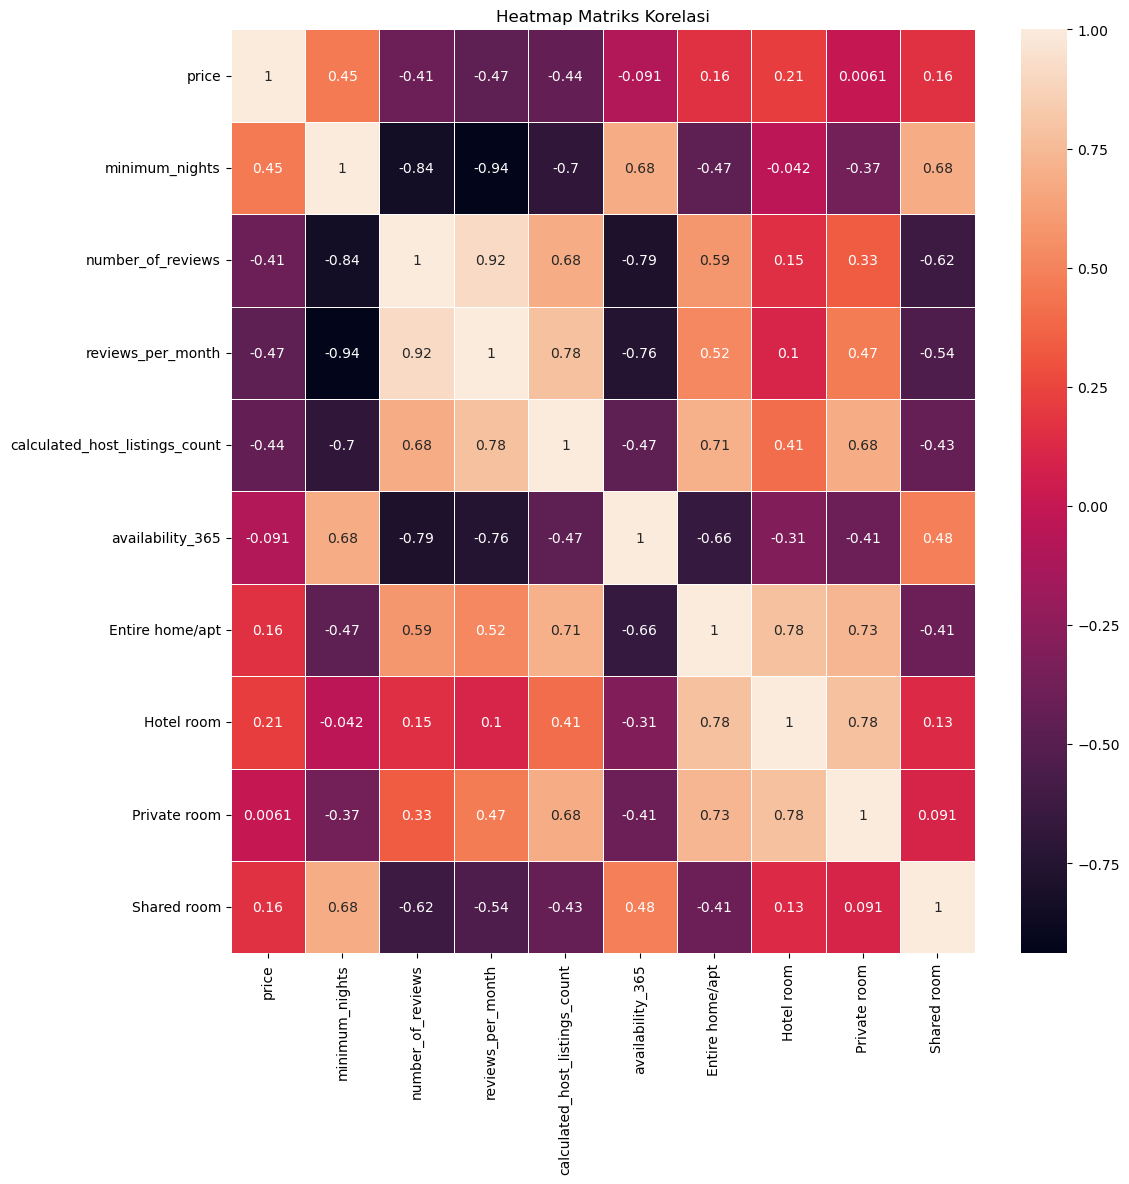

In [123]:
# Mengatur ukuran plot
plt.figure(figsize=(12, 12))

# Membuat heatmap
sns.heatmap(correlation_matrix.corr('spearman'), annot=True, linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Matriks Korelasi')

# Menampilkan plot
plt.show()


### **Interpretasi**

#### **1. Korelasi Antara price dan Variabel Lain**

- price vs. minimum_nights (0.45): Korelasi positif moderat menunjukkan bahwa listing dengan harga lebih tinggi cenderung memiliki persyaratan malam minimum yang lebih panjang. Ini mungkin karena listing dengan harga lebih tinggi menawarkan fasilitas atau lokasi premium yang membutuhkan masa inap yang lebih lama.

- price vs. number_of_reviews (-0.41): Korelasi negatif yang moderat menunjukkan bahwa listing dengan harga lebih tinggi cenderung mendapatkan lebih sedikit ulasan. Ini bisa berarti bahwa harga yang lebih tinggi membuat listing kurang diminati, atau bahwa listing ini lebih selektif dalam mendapatkan ulasan.

- price vs. reviews_per_month (-0.47): Korelasi negatif yang cukup kuat menunjukkan bahwa listing dengan harga lebih tinggi cenderung mendapatkan lebih sedikit ulasan bulanan, yang sejalan dengan korelasi antara harga dan jumlah ulasan.

- price vs. calculated_host_listings_count (-0.44): Korelasi negatif yang moderat menunjukkan bahwa host yang memiliki banyak listing cenderung memiliki listing dengan harga lebih rendah. Ini mungkin karena host yang memiliki banyak listing lebih fokus pada volume dan harga yang lebih kompetitif.

- price vs. availability_365 (-0.091): Korelasi negatif yang sangat lemah menunjukkan bahwa harga tidak memiliki pengaruh besar terhadap ketersediaan listing sepanjang tahun.





- price vs. Entire home/apt (0.16): Korelasi positif yang sangat lemah menunjukkan bahwa Entire home/apt cenderung memiliki harga yang sedikit lebih tinggi dibandingkan tipe kamar lainnya, tetapi korelasinya tidak kuat.

- price vs. Hotel room (0.21): Korelasi positif yang lemah menunjukkan bahwa Hotel room cenderung memiliki harga yang lebih tinggi dibandingkan tipe kamar lainnya, tetapi korelasinya tidak signifikan.

- price vs. Private room (0.0061): Korelasi yang hampir tidak ada menunjukkan bahwa Private room tidak memiliki perbedaan harga yang signifikan dibandingkan dengan tipe kamar lainnya.

- price vs. Shared room (0.16): Korelasi positif yang sangat lemah menunjukkan bahwa Shared room mungkin memiliki sedikit variasi harga, tetapi korelasinya sangat lemah.

#### **2. Korelasi Antara Variabel Popularitas**

- number_of_reviews vs. reviews_per_month (0.92): Korelasi positif yang sangat kuat menunjukkan bahwa listing yang memiliki banyak ulasan secara keseluruhan juga cenderung mendapatkan lebih banyak ulasan bulanan. Ini masuk akal karena listing populer cenderung terus mendapatkan perhatian dan ulasan dari tamu.

- number_of_reviews vs. calculated_host_listings_count (0.68): Korelasi positif yang kuat menunjukkan bahwa host yang memiliki lebih banyak listing cenderung memiliki listing dengan lebih banyak ulasan. Ini mungkin karena host ini lebih berpengalaman atau memiliki listing yang lebih menarik.

- reviews_per_month vs. calculated_host_listings_count (0.78): Korelasi positif yang kuat menunjukkan bahwa listing yang dimiliki oleh host dengan lebih banyak listing cenderung mendapatkan lebih banyak ulasan per bulan. Ini mungkin menunjukkan bahwa host yang memiliki banyak listing juga memiliki strategi pemasaran yang efektif.


##### Korelasi Variabel Pupularitas (numer_of_review, calculated_host_listing_count, review_per_month) VS Tipe Kamar

**number_of_reviews vs Tipe Kamar**

- number_of_reviews vs. Entire home/apt (0.59):
Korelasi positif moderat menunjukkan bahwa Entire home/apt cenderung lebih populer dalam hal jumlah ulasan dibandingkan dengan tipe kamar lainnya. Ini mungkin disebabkan oleh preferensi tamu yang lebih suka menyewa seluruh rumah atau apartemen untuk privasi dan kenyamanan.

- number_of_reviews vs. Hotel room (0.15):
Korelasi positif yang sangat lemah menunjukkan bahwa Hotel room memiliki jumlah ulasan yang sedikit lebih tinggi, tetapi korelasinya sangat lemah. Hal ini mungkin menunjukkan bahwa tamu yang menginap di hotel room tidak terlalu berbeda dalam hal memberikan ulasan dibandingkan dengan tipe kamar lainnya.

- number_of_reviews vs. Private room (0.33):
Korelasi positif lemah menunjukkan bahwa Private room mungkin memiliki sedikit lebih banyak ulasan dibandingkan dengan tipe kamar lainnya, tetapi tidak sekuat Entire home/apt. Tamu mungkin lebih suka privasi yang ditawarkan oleh kamar pribadi meskipun tidak setinggi Entire home/apt.

- number_of_reviews vs. Shared room (-0.62):
Korelasi negatif yang cukup kuat menunjukkan bahwa Shared room cenderung memiliki lebih sedikit ulasan dibandingkan dengan tipe kamar lainnya. Ini mungkin menunjukkan bahwa tamu kurang tertarik pada opsi berbagi kamar, sehingga mereka cenderung memberikan ulasan yang lebih sedikit.

**reviews_per_month vs Tipe Kamar**

- reviews_per_month vs. Entire home/apt (0.52):
Korelasi positif moderat menunjukkan bahwa Entire home/apt cenderung mendapatkan lebih banyak ulasan per bulan dibandingkan dengan tipe kamar lainnya. Ini sejalan dengan temuan pada number_of_reviews, di mana Entire home/apt cenderung lebih populer.

- reviews_per_month vs. Hotel room (0.10):
Korelasi yang sangat lemah menunjukkan bahwa Hotel room tidak memiliki keunggulan signifikan dalam hal mendapatkan ulasan bulanan. Hal ini mungkin menunjukkan bahwa tamu yang menginap di hotel room mungkin tidak seaktif dalam memberikan ulasan bulanan dibandingkan dengan tipe kamar lainnya.

- reviews_per_month vs. Private room (0.47):
Korelasi positif moderat menunjukkan bahwa Private room juga cenderung mendapatkan ulasan bulanan yang cukup banyak, meskipun tidak setinggi Entire home/apt.

- reviews_per_month vs. Shared room (-0.54):
Korelasi negatif yang cukup kuat menunjukkan bahwa Shared room cenderung mendapatkan lebih sedikit ulasan bulanan dibandingkan dengan tipe kamar lainnya. Hal ini sejalan dengan kecenderungan Shared room untuk kurang diminati.

**calculated_host_listings_count vs Tipe Kamar**

- calculated_host_listings_count vs. Entire home/apt (0.71):
Korelasi positif yang kuat menunjukkan bahwa host dengan lebih banyak listing cenderung memiliki lebih banyak listing dengan tipe Entire home/apt. Ini mungkin karena host profesional lebih memilih untuk menawarkan entire home/apartment yang dapat menghasilkan lebih banyak pendapatan dan lebih diminati.

- calculated_host_listings_count vs. Hotel room (0.41):
Korelasi positif moderat menunjukkan bahwa host yang memiliki lebih banyak listing mungkin cenderung juga memiliki hotel rooms, meskipun tidak sekuat preferensi terhadap Entire home/apt.

- calculated_host_listings_count vs. Private room (0.68):
Korelasi positif yang cukup kuat menunjukkan bahwa Private room juga cenderung dikelola oleh host yang memiliki banyak listing. Ini menunjukkan bahwa host profesional mungkin melihat nilai dalam menawarkan kamar pribadi sebagai opsi yang lebih terjangkau atau lebih mudah dikelola dibandingkan entire home/apartment.

- calculated_host_listings_count vs. Shared room (-0.43):
Korelasi negatif moderat menunjukkan bahwa host yang memiliki banyak listing cenderung tidak memiliki Shared room. Ini mungkin karena Shared room memiliki margin keuntungan yang lebih rendah dan kurang diminati oleh tamu.

#### **3. Korelasi Antara availability_365 dan Variabel Lain**

- availability_365 vs. number_of_reviews (-0.79): Korelasi negatif yang kuat menunjukkan bahwa listing yang lebih sering tersedia sepanjang tahun cenderung mendapatkan lebih sedikit ulasan. Ini mungkin karena listing yang sering tersedia mungkin tidak sepopuler atau tidak terjual sebanyak listing yang lebih sedikit tersedia.

- availability_365 vs. reviews_per_month (-0.76): Korelasi negatif yang kuat menunjukkan bahwa listing yang lebih sering tersedia sepanjang tahun cenderung mendapatkan lebih sedikit ulasan bulanan, yang sejalan dengan korelasi antara ketersediaan dan jumlah ulasan secara keseluruhan.

- availability_365 vs. calculated_host_listings_count (-0.47): Korelasi negatif moderat menunjukkan bahwa host yang memiliki lebih banyak listing cenderung memiliki listing yang tidak selalu tersedia sepanjang tahun. Ini mungkin karena host ini lebih sering menyewakan properti mereka dan memiliki tingkat hunian yang lebih tinggi.

#### **4. Korelasi Antara Tipe Kamar (room_type) dan Variabel Lain**

- Entire home/apt vs. number_of_reviews (0.59): Korelasi positif moderat menunjukkan bahwa listing dengan tipe Entire home/apt cenderung memiliki lebih banyak ulasan dibandingkan tipe kamar lainnya. Ini mungkin karena tipe ini lebih menarik bagi tamu yang mencari privasi dan kenyamanan.

- Hotel room vs. number_of_reviews (0.15): Korelasi positif yang sangat lemah menunjukkan bahwa Hotel room memiliki jumlah ulasan yang sedikit lebih tinggi, tetapi korelasinya tidak signifikan.

- Private room vs. number_of_reviews (0.33): Korelasi positif lemah menunjukkan bahwa Private room mungkin memiliki sedikit lebih banyak ulasan dibandingkan tipe kamar lainnya, tetapi tidak sekuat Entire home/apt.

- Shared room vs. number_of_reviews (-0.62): Korelasi negatif yang kuat menunjukkan bahwa Shared room cenderung memiliki lebih sedikit ulasan dibandingkan dengan tipe kamar lainnya, yang mungkin karena preferensi tamu yang lebih suka privasi.


### Kesimpulan Interpretasi

**1. Tipe Kamar yang Paling Populer di Setiap Neighborhood**

- Entire home/apt adalah tipe kamar yang paling populer: Berdasarkan analisis korelasi, Entire home/apt cenderung menjadi pilihan yang paling populer di banyak neighborhood. Ini terlihat dari korelasi positif yang cukup kuat antara Entire home/apt dengan variabel-variabel popularitas seperti number_of_reviews dan reviews_per_month. Tamu lebih cenderung memilih entire home atau apartemen karena menawarkan lebih banyak privasi dan kenyamanan dibandingkan dengan tipe kamar lainnya.

- Private room juga cukup populer: Private room menunjukkan popularitas yang cukup signifikan di berbagai neighborhood, meskipun tidak sekuat Entire home/apt. Ini menunjukkan bahwa di beberapa neighborhood, kamar pribadi masih menjadi pilihan favorit bagi tamu, mungkin karena menawarkan privasi dengan harga yang lebih terjangkau.

- Shared room paling tidak populer: Di hampir semua neighborhood, Shared room cenderung kurang diminati. Ini terlihat dari korelasi negatif yang kuat antara Shared room dengan jumlah ulasan dan ulasan bulanan. Tipe kamar ini mungkin kurang diminati karena tamu lebih memilih opsi yang menawarkan privasi yang lebih besar.

- Hotel room memiliki popularitas yang lemah: Hotel room tidak menunjukkan hubungan yang signifikan dengan popularitas di banyak neighborhood. Ini mungkin karena tamu di Airbnb mencari pengalaman yang berbeda dari penginapan hotel konvensional, yang membuat hotel room tidak menjadi pilihan utama di platform ini.

**2. Distribusi Tipe Kamar di Berbagai Wilayah**

- Distribusi Entire home/apt tersebar luas di banyak neighborhood: Tipe kamar ini cenderung menjadi yang paling banyak tersedia dan paling sering dipilih oleh tamu di berbagai wilayah. Ini menunjukkan bahwa host di berbagai neighborhood memahami permintaan ini dan lebih cenderung menawarkan entire home/apartment sebagai opsi utama mereka.

- Private room juga tersebar tetapi tidak sekuat Entire home/apt: Sementara Private room cukup banyak tersedia di berbagai neighborhood, preferensi terhadap tipe kamar ini lebih rendah dibandingkan dengan Entire home/apt. Distribusinya lebih bervariasi tergantung pada karakteristik neighborhood.

- Shared room terbatas dalam distribusi: Karena popularitas yang rendah, Shared room cenderung lebih sedikit didistribusikan dan hanya tersedia di beberapa neighborhood. Host mungkin lebih enggan menawarkan tipe kamar ini karena permintaannya yang rendah.

- Hotel room tersebar tetapi kurang signifikan: Meskipun Hotel room tersedia di berbagai neighborhood, tipe kamar ini tidak menunjukkan distribusi yang signifikan dalam hal popularitas, mengindikasikan bahwa tamu Airbnb mungkin mencari opsi penginapan yang berbeda dari hotel konvensional.

**3. Pengaruh Harga terhadap Popularitas Tipe Kamar**

- Harga lebih tinggi cenderung menurunkan popularitas: Korelasi negatif antara harga dan variabel-variabel popularitas seperti number_of_reviews dan reviews_per_month menunjukkan bahwa listing dengan harga lebih tinggi cenderung kurang diminati. Ini berarti bahwa meskipun Entire home/apt dan Private room populer, harga yang terlalu tinggi mungkin mengurangi minat tamu, yang pada gilirannya dapat mempengaruhi jumlah ulasan dan tingkat okupansi.

- Harga tidak menjadi penentu utama popularitas tipe kamar: Meskipun harga mempengaruhi popularitas, pengaruhnya tidak dominan. Tamu cenderung lebih memilih tipe kamar berdasarkan faktor lain seperti privasi dan kenyamanan, dibandingkan hanya berdasarkan harga. Entire home/apt dan Private room tetap populer bahkan dengan variasi harga yang berbeda di berbagai neighborhood.

# Kesimpulan Akhir Terkait Problem Statement

- Tipe kamar yang paling populer di berbagai neighborhood adalah Entire home/apt, diikuti oleh Private room. Kedua tipe kamar ini cenderung lebih diminati oleh tamu karena menawarkan lebih banyak privasi dan kenyamanan. Distribusinya luas di berbagai wilayah, yang mencerminkan preferensi pasar.

- Shared room dan Hotel room kurang populer di berbagai neighborhood. Host dan tamu cenderung menghindari opsi ini, yang mungkin karena preferensi untuk pengalaman yang lebih pribadi dan unik di Airbnb.

- Harga memiliki pengaruh yang moderat terhadap popularitas, dengan kecenderungan bahwa harga yang lebih tinggi menurunkan popularitas listing. Namun, harga bukanlah satu-satunya faktor; tipe kamar dan kualitas pengalaman yang ditawarkan memainkan peran lebih besar dalam menarik ulasan dan meningkatkan popularitas.